<h1 style='color:red'> House Price Assignment

<h3 style='color:green'>Advanced Regression - Machine Learning 2

`Submission Harish Dave`

### Problem Statement
- **Customer: US based housing company Surprise Housing**
- Customer wants to enter Australian real estate market.
- Customer scouting for right kind of buying opportunities.
- Customer strategy is to purchase house at a price below their actual values and sell them later to maximize profit.


- Objective is to use data analytics and build a regression model with regularisation.
- Model will be used to predict the actual value of the prospective properties and decide whether to invest.
- Also find out:
    - Which variables are significant in predicting the price of a house.
    - How well those variables describe the price of a house.

### Table of Contents
<br>**1. Data Understanding**
<br>**2. Data Quality & Data Handling**
<br>**3. EDA**
    <br> 3.1 Numerical Variables
    <br> 3.2 Categorical Variables
<br> **4. Preparation for Modeling**
    <br> 4.1 New metrics
    <br> 4.2 Dummy Variables
    <br> 4.3 Train-Test split
    <br> 4.4 Scaling
<br>**5. Regression Model without regularization**
    <br> 5.1 Model-1 - Influence of Overall Quality and Living Area on SalePrice
    <br> 5.2 Model-2 - Model with 5 to 10 parameters
    <br> 5.3 Evaluation for Model-2
<br>**6. Ridge Regression with Regularization**
    <br> 6.1 Model-3: Ridge with Cross Validation
    <br> 6.2 Model-3 Evaluation
<br>**7. Lasso Regression with Regularization**
    <br> 7.1 Model-4: Lasso with Cross Validation
    <br> 7.2 Model-4: Evaluation
<br>**8. Sensitivity Studies**
    <br> 8.1 Model-5: What if we double the value of alpha for ridge ?
    <br> 8.2 Model-6: What if we double the value of alpha for lasso ?
    <br> 8.2 Model-7: What happens if five most important predictor variables in the lasso model are not available in the incoming data?
<br>**9. Conclusions**

## Step-1: Data Understanding

In [1]:
# Import libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn
%matplotlib inline

In [2]:
# Input Dataset

df = pd.read_csv('train.csv')
df.shape

(1460, 81)

<h5 style = 'color:blue'> 81 Columns

In [3]:
# First Few Lines of data
pd.set_option('display.max_columns', None)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<h5 style = 'color:blue'> Lot of columns seems to be categorical

In [4]:
# Information summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h5 style = 'color:blue'> Quite a few missing values. Will need to be cleaned up.

In [5]:
# Lets look at descriptive stats of few basic columns.

basic_cols = ['SalePrice','LotArea','GrLivArea','GarageArea']
df[basic_cols].describe()

,SalePrice,LotArea,GrLivArea,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,1515.463699,472.980137
std,79442.502883,9981.264932,525.480383,213.804841
min,34900.000000,1300.000000,334.000000,0.000000
25%,129975.000000,7553.500000,1129.500000,334.500000
50%,163000.000000,9478.500000,1464.000000,480.000000
75%,214000.000000,11601.500000,1776.750000,576.000000
max,755000.000000,215245.000000,5642.000000,1418.000000


<h5 style = 'color:blue'> Looks OK with mean and median nearly in same ball park.

In [6]:
# Ratio of price vs. living area size, just to get a feel

print ('Ratio of Max to Min SalePrice = ', round(df.SalePrice.max()/df.SalePrice.min(),1))
print ('Ratio of Max to Min GrLivArea SQFT= ', round(df.GrLivArea.max()/df.GrLivArea.min(),1))

Ratio of Max to Min SalePrice =  21.6
Ratio of Max to Min GrLivArea SQFT=  16.9


<h5 style = 'color:blue'> Looks sensible i.e. ratio of sale price seems to be roughly corresponding to living area size

## Step-2: Data Quality & Data Handling

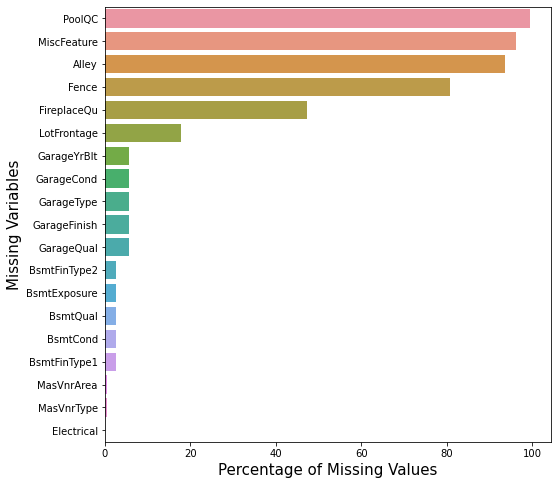

In [7]:
## Calculate percentage of missing values in the Data

df_missing =pd.DataFrame(df.isnull().sum()/len(df)*100)
df_missing.rename(columns={0 :'% Missing Values'}, inplace=True)
df_missing.sort_values(by='% Missing Values',ascending=False, inplace=True)
df_missing=df_missing[df_missing['% Missing Values']>0]

## Plot percentage of missing values in the Data

plt.figure(figsize=[8,8])
sns.barplot(data=df_missing, x='% Missing Values',y=df_missing.index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Percentage of Missing Values', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.ylabel('Missing Variables', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.show()

In [8]:
df_missing.head(10)

,% Missing Values
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945


<h5 style = 'color:blue'> Columns with more than 80% missing values can be dropped from the analysis.

In [9]:
# Drop columns with more than 80% missing values

drop_cols = ['PoolQC','MiscFeature','Alley','Fence']
df.drop(columns=drop_cols, inplace=True)
df.shape

(1460, 77)

In [10]:
# Lets look at FireplaceQu

col_name = 'FireplaceQu'
print ('Null values:', df[col_name].isnull().sum())
df[col_name].value_counts()

Null values: 690


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
# Replace null value in FireplaceQu with No Fireplace that is NA according to the provided data description

col_name = 'FireplaceQu'
df[col_name].fillna('NA', inplace=True)
df[col_name].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

LotFrontage
Null values: 259
Correlation with SalePrice:  0.35


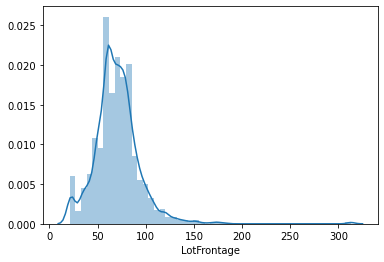

In [12]:
# Lets look at LotFrontage

col_name = 'LotFrontage'
print (col_name)
print ('Null values:', df[col_name].isna().sum())
print ('Correlation with SalePrice: ', round(df['SalePrice'].corr(df[col_name]),2))
sns.distplot(df[col_name])
plt.show()

<h5 style = 'color:blue'> LotFrontage is moderately correlated to target variable SalePrice, has about 17% missing values.

In [13]:
# Replace null value in LotFrontage with median

col_name = 'LotFrontage'
df[col_name].fillna(df[col_name].median(), inplace=True)
print ('Null values:', df[col_name].isna().sum())

Null values: 0


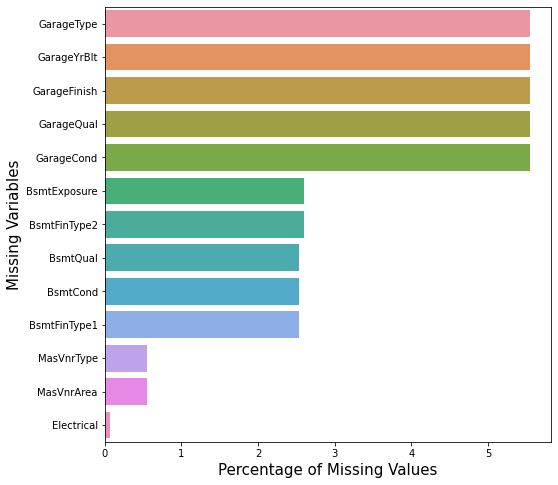

In [14]:
## Calculate percentage of missing values in the Data

df_missing =pd.DataFrame(df.isnull().sum()/len(df)*100)
df_missing.rename(columns={0 :'% Missing Values'}, inplace=True)
df_missing.sort_values(by='% Missing Values',ascending=False, inplace=True)
df_missing=df_missing[df_missing['% Missing Values']>0]

## Plot percentage of missing values in the Data

plt.figure(figsize=[8,8])
sns.barplot(data=df_missing, x='% Missing Values',y=df_missing.index)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Percentage of Missing Values', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.ylabel('Missing Variables', fontdict = {'fontsize': 15, 'fontweight': 15})
plt.show()

<h5 style = 'color:blue'> Looks like we are left with 3 groups of missing values (Garage, Bsmt and MasVnt). And one column Electrical. 

In [15]:
# Lets look whats in the Garage

cols_name = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
df[cols_name].head()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Attchd,2003.0,RFn,TA,TA
1,Attchd,1976.0,RFn,TA,TA
2,Attchd,2001.0,RFn,TA,TA
3,Detchd,1998.0,Unf,TA,TA
4,Attchd,2000.0,RFn,TA,TA


GarageYrBlt
Null values: 81
Correlation with SalePrice:  0.49


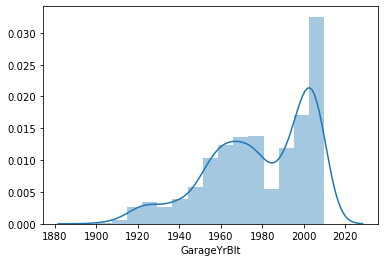

In [16]:
# Lets look at GarageYrBlt

col_name = 'GarageYrBlt'
print (col_name)
print ('Null values:', df[col_name].isna().sum())
print ('Correlation with SalePrice: ', round(df['SalePrice'].corr(df[col_name]),2))
sns.distplot(df[col_name])
plt.show()

<h5 style = 'color:blue'> GarageYrBlt is moderately correlated to target variable SalePrice with 5% missing values

In [17]:
# Lets look at GarageArea if GarageYrBlt isna

df[df.GarageYrBlt.isna()]['GarageArea'].sum()

0

<h5 style = 'color:blue'> GarageYrBlt isna if GarageArea is 0, meaning there is no garage.

In [18]:
# Replace null value in Garage with No Garage that is NA according to the provided data description

cols_name = ['GarageType','GarageFinish','GarageQual','GarageCond']
for item in cols_name:
    df[item].fillna('NA', inplace=True)

In [19]:
# Replace null value in GarageYrBlt with 0 since there is no garage.

col_name = 'GarageYrBlt'
df[col_name].fillna(0, inplace=True)
print ('Null values:', df[col_name].isna().sum())

Null values: 0


In [20]:
# Lets go to the basement

cols_name = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1']
df[cols_name].head()

,BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
0,No,Unf,Gd,TA,GLQ
1,Gd,Unf,Gd,TA,ALQ
2,Mn,Unf,Gd,TA,GLQ
3,No,Unf,TA,Gd,ALQ
4,Av,Unf,Gd,TA,GLQ


<h5 style = 'color:blue'> All are categorical strings. So null values simply correspond to having no basement.

In [21]:
# Replace null value in Basement with No Basement that is NA according to the provided data description

cols_name = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtFinType1']
for item in cols_name:
    df[item].fillna('NA', inplace=True)

In [22]:
# Lets look at Masonary

cols_name = ['MasVnrType','MasVnrArea']
df[cols_name].head()

,MasVnrType,MasVnrArea
0,BrkFace,196.0
1,None,0.0
2,BrkFace,162.0
3,None,0.0
4,BrkFace,350.0


In [23]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<h5 style = 'color:blue'> Missing values in MasVnrType means no veneer. And hence MasVnrArea = 0.

In [24]:
# Replace null value in MasVnrType with None according to the provided data description

col_name = 'MasVnrType'
df[col_name].fillna('None', inplace=True)

In [25]:
# Replace null value in MasVnrArea with 0 since there is no mass veneering done

col_name = 'MasVnrArea'
df[col_name].fillna(0, inplace=True)

In [26]:
# Lets look at Electrical

df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<h5 style = 'color:blue'> Missing values in Electrical can be replaced with Mode.

In [27]:
# Replace null value in Electrical with Mode

col_name = 'Electrical'
df[col_name].fillna(df[col_name].mode()[0], inplace=True)
print ('Null values:', df[col_name].isna().sum())

Null values: 0


In [28]:
# Checking for Missing values again

[ col_name for col_name in df.columns if df[col_name].isnull().any() ]

[]

<h5 style = 'color:blue'> No missing values.

In [29]:
df.shape

(1460, 77)

<h5 style = 'color:blue'> So far, no rows are dropped.

In [30]:
df['Id'].duplicated().sum()

0

<h5 style = 'color:blue'> No duplicate rows with same Id

In [31]:
df.columns.duplicated().sum()

0

<h5 style = 'color:blue'> No duplicate columns with same name

<h5 style = 'color:blue'> We now have clean data ready for EDA and possibly more data quality issues can be discovered.

## Step-3: EDA

In [32]:
# Numerical Variables in the data

num_cols = df.columns[df.dtypes!='object']
len(num_cols)

38

In [33]:
# string Variables in the data

str_cols = df.columns[df.dtypes =='object']
len(str_cols)

39

Looks like nearly same number of columns having numerical & string. Lets do EDA for numerical columns first and then look into categorical.

## Step-3.1: EDA of Numerical Variables 

Since number of numerical variables are high, lets divide the numerical columns into sub groups and dive into each of them seperately 

In [34]:
# Columns with information of size

size_cols = ['SalePrice','LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

In [35]:
# Columns with information of year, month

time_cols = ['SalePrice','YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']

In [36]:
# Columns with remaining numerical columns after removing size_cols and time_cols

rest_cols = list(num_cols)
for item in size_cols:
    rest_cols.remove(item)
rest_cols.append('SalePrice')
for item in time_cols:
    rest_cols.remove(item)
rest_cols.remove('Id')
rest_cols.append('SalePrice')

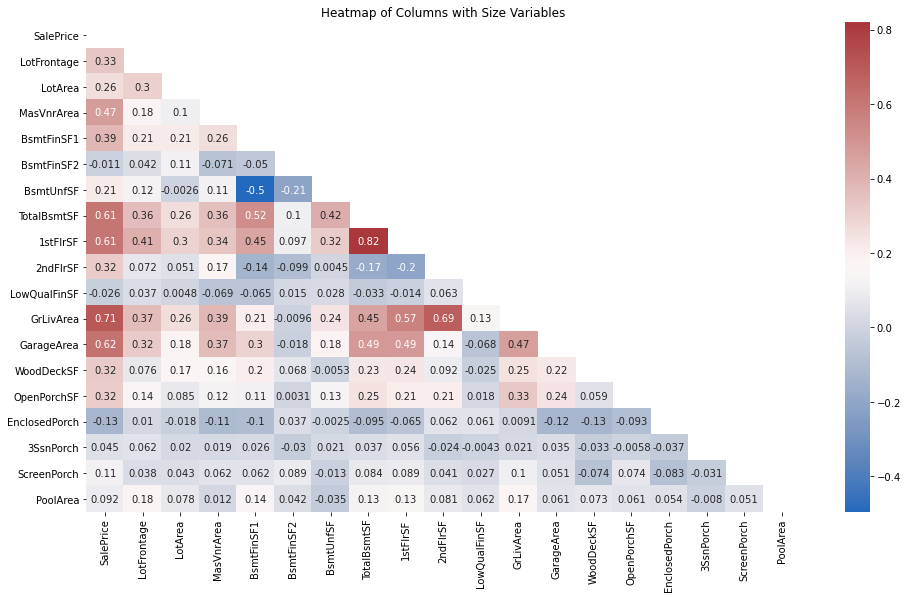

In [37]:
# Heatmap of size_cols

plt.figure(figsize = (16,9))
mask1 = np.zeros_like(df[size_cols].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(df[size_cols].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Columns with Size Variables')
plt.show()

<h5 style = 'color:blue'> SalePrice is highly correlated to: GrLivArea, GarageArea,TotalBsmtSF, 1stFlrSF, MasVnrArea. LotArea is not so strongly correlated.

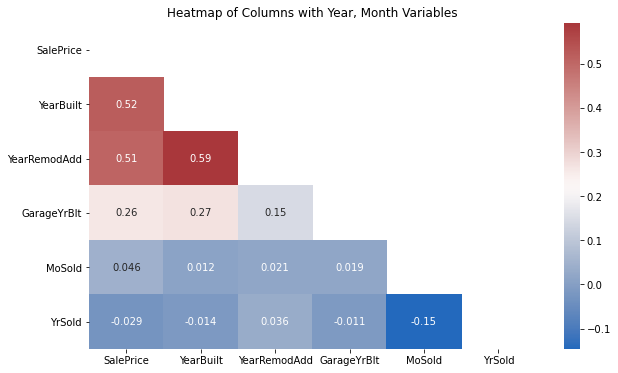

In [38]:
# Heatmap of time_cols

plt.figure(figsize = (10,6))
mask1 = np.zeros_like(df[time_cols].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(df[time_cols].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Columns with Year, Month Variables')
plt.show()

<h5 style = 'color:blue'> SalePrice is highly correlated to: YearBuilt, YearRemodAdd. SalePrice is moderately correlated to: GarageYearBlt

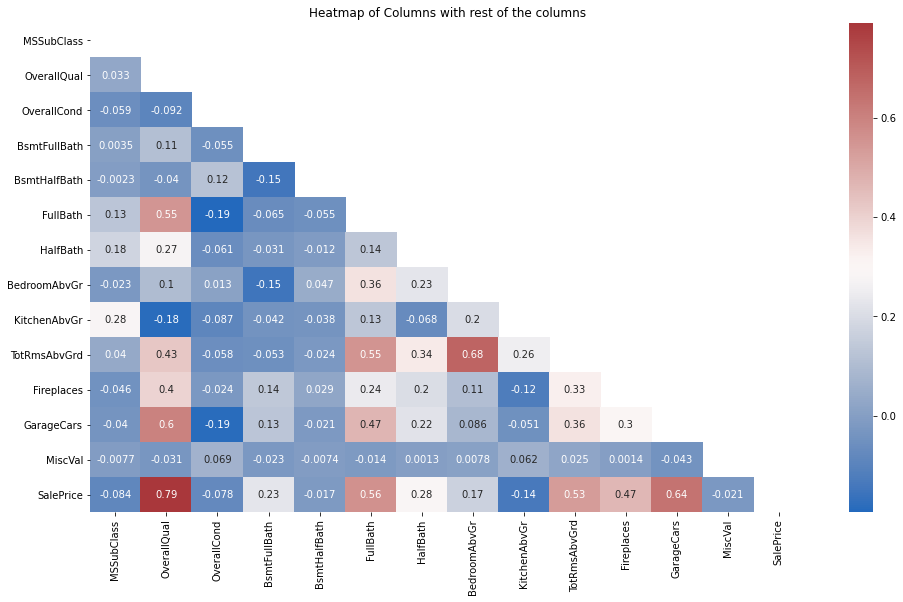

In [39]:
# Heatmap of rest_cols

plt.figure(figsize = (16,9))
mask1 = np.zeros_like(df[rest_cols].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(df[rest_cols].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap of Columns with rest of the columns')
plt.show()

<h5 style = 'color:blue'> SalePrice is highly correlated to: OverallQual, GarageCars,FullBath, TotRomsAbvGrd, Fireplaces

In [40]:
# Let us now identify which are the top-15 correlations with SalePrice

# Columns
num_list = list(num_cols)
num_list.remove('Id')

# Correlation Matrix
df_corr = df[num_list].corr()
df_corr.sort_values(by='SalePrice', ascending=False, inplace=True)

# Print the top-15 correlations
print ('Top 15 Correlations with SalePrice to look out for while EDA')
print ('---------------------------------------------------------')
print (round(df_corr['SalePrice'].head(16),2))

Top 15 Correlations with SalePrice to look out for while EDA
---------------------------------------------------------
SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
MasVnrArea      0.47
Fireplaces      0.47
BsmtFinSF1      0.39
LotFrontage     0.33
WoodDeckSF      0.32
Name: SalePrice, dtype: float64


<h5 style = 'color:blue'> Top-15 numeric column correlation with SalePrice are shown above.

### Reg plot , Scatter plots

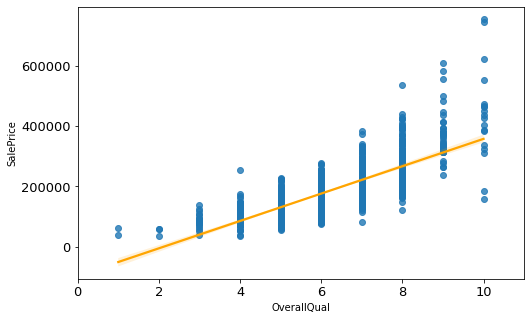

In [41]:
# Scatter Plot of OverallQual

col_x = 'OverallQual'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 11)
plt.show()

<h5 style = 'color:blue'> Increasing Trend of Price with Quality. Quadriatic term of OverallQual might fit better.

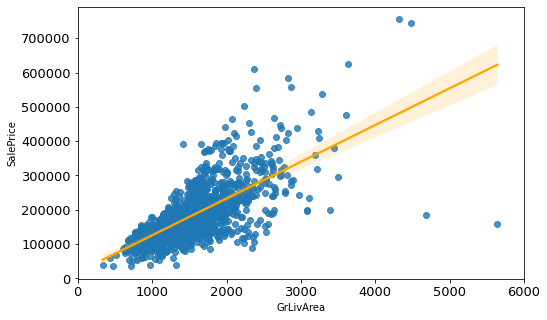

In [42]:
# Scatter Plot of GrLivArea

col_x = 'GrLivArea'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 6000)
plt.show()

<h5 style = 'color:blue'> Increasing Trend of Price with GrLivArea. But why are there points with low SalePrice but high GrLivArea

In [43]:
# List the outlier properties

df[df.GrLivArea >= 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


- OverallQual is 10 for all 4. 
- Low SalePrice properties are new. 
- Low SalePrice properties look suspicious due to high OverallQual, being new still cheap. So lets drop them.

In [44]:
# Drop the 2 suspicious looking properties with low sale price, high GrLivArea, Newly built, OVerallQual 10

df.drop(df[(df.GrLivArea >= 4000) & (df.SalePrice <= 200000)].index, inplace=True)
df.shape

(1458, 77)

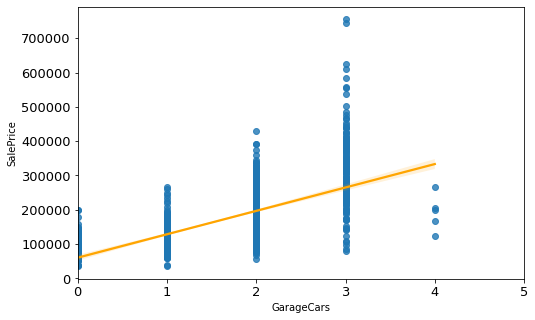

In [45]:
# Scatter Plot of GarageCars

col_x = 'GarageCars'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 5)
plt.show()

In [46]:
# List the outlier properties

df[df.GarageCars >= 4][num_cols]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
420,421,90,78.0,7060,7,5,1997,1998,200.0,1309,0,35,1344,1344,0,0,1344,2,0,2,0,2,2,8,0,1997.0,4,784,0,0,0,0,0,0,0,11,2008,206300
747,748,70,65.0,11700,7,7,1880,2003,0.0,0,0,1240,1240,1320,1320,0,2640,0,0,1,1,4,1,8,1,1950.0,4,864,181,0,386,0,0,0,0,5,2009,265979
1190,1191,190,69.0,32463,4,4,1961,1975,149.0,1159,0,90,1249,1622,0,0,1622,1,0,1,0,3,1,7,1,1975.0,4,1356,439,0,0,0,0,0,0,3,2007,168000
1340,1341,20,70.0,8294,4,5,1971,1971,0.0,0,0,858,858,872,0,0,872,0,0,1,0,3,1,5,0,1974.0,4,480,0,0,0,0,0,0,0,6,2007,123000
1350,1351,90,91.0,11643,5,5,1969,1969,368.0,500,0,748,1248,1338,1296,0,2634,1,1,2,2,6,2,12,0,1969.0,4,968,0,0,0,0,0,0,0,8,2009,200000


In [47]:
# Check the Garage area per car for these seemingly outlier properties

df[df.GarageCars >= 4]['GarageArea'] / df[df.GarageCars >= 4]['GarageCars']

420     196.0
747     216.0
1190    339.0
1340    120.0
1350    242.0
dtype: float64

Property ID 1340 with just 120 sqft garage area per car looks suspicious. Lets drop it.

In [48]:
# Drop the 1 suspicious looking property with low Garage area per car

df.drop(df[(df.GarageCars >= 4) & (df.SalePrice <= 150000)].index, inplace=True)
df.shape

(1457, 77)

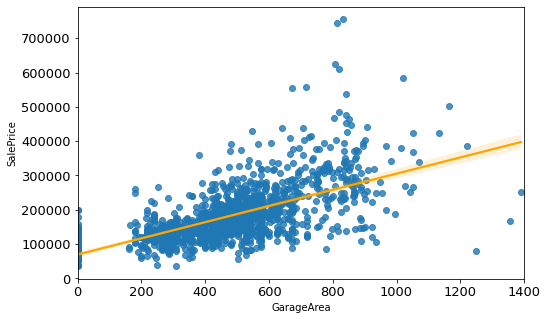

In [49]:
# Scatter Plot of GarageArea

col_x = 'GarageArea'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 1400)
plt.show()

<h5 style = 'color:blue'> Increasing Trend of Price with GarageArea. But why are there points with low SalePrice but high GarageArea

In [50]:
# List the outlier properties

df[df.GarageArea >= 1300]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,0,8,2009,New,Partial,253293
1190,1191,190,RL,69.0,32463,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,0,3,2007,WD,Normal,168000


Looks like outlier - let us drop

In [51]:
# Drop the 2 properties with low sale price, but high GarageArea

df.drop(df[df.GarageArea >= 1300].index, inplace=True)
df.shape

(1455, 77)

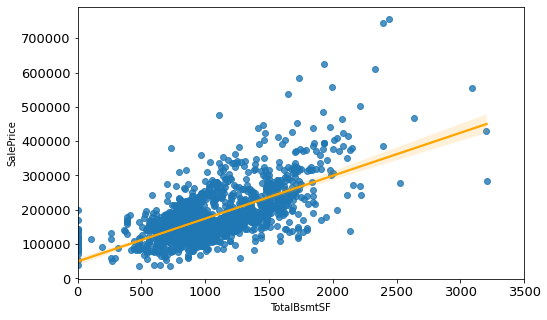

In [52]:
# Scatter Plot of TotalBsmtSF

col_x = 'TotalBsmtSF'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 3500)
plt.show()

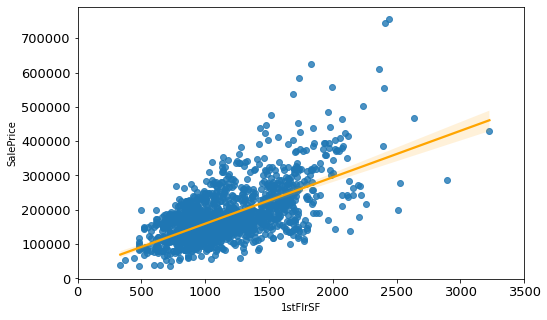

In [53]:
# Scatter Plot of 1stFlrSF

col_x = '1stFlrSF'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 3500)
plt.show()

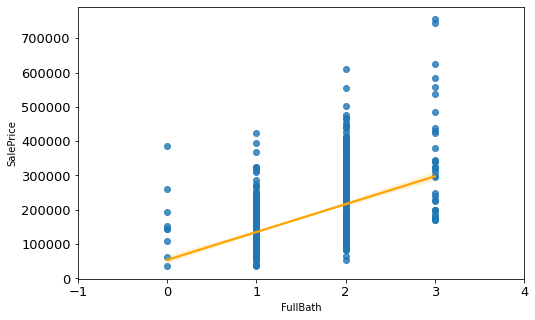

In [54]:
# Scatter Plot of FullBath

col_x = 'FullBath'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(-1, 4)
plt.show()

<h5 style = 'color:blue'> Increasing Trend of Price. But zero FullBath ? 

In [55]:
# List the properties with FullBAth = 0

df[df.FullBath == 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,0,11,2006,WD,Normal,385000
188,189,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,0,6,2009,WD,Alloca,153337
375,376,30,RL,69.0,10020,Pave,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NA,NA,0.0,NA,0,0,NA,NA,Y,0,0,0,0,0,0,0,3,2009,WD,Normal,61000
597,598,120,RL,53.0,3922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,0,2,2007,New,Partial,194201
634,635,90,RL,64.0,6979,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NA,Detchd,1980.0,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,600,6,2010,WD,Normal,144000
916,917,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NA,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,0,10,2006,WD,Abnorml,35311
1163,1164,90,RL,60.0,12900,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,TA,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,NA,CarPort,1969.0,Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,0,1,2008,WD,Alloca,108959
1213,1214,80,RL,69.0,10246,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NA,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,0,5,2006,WD,Normal,145000
1270,1271,40,RL,69.0,23595,Pave,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,0,4,2010,WD,Normal,260000


<h5 style = 'color:blue'> It has half bathrooms and basemennt baths. Lets keep the diversity of the data intact. So retain.

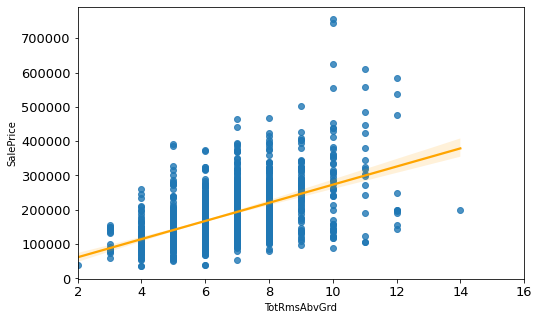

In [56]:
# Scatter Plot of TotRmsAbvGrd

col_x = 'TotRmsAbvGrd'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(2, 16)
plt.show()

<h5 style = 'color:blue'> One property has 14 rooms but is cheap. Outlier.

In [57]:
# Drop the 1 suspicious looking properties with 14 rooms but low price

df.drop(df[df.TotRmsAbvGrd == 14].index, inplace=True)
df.shape

(1454, 77)

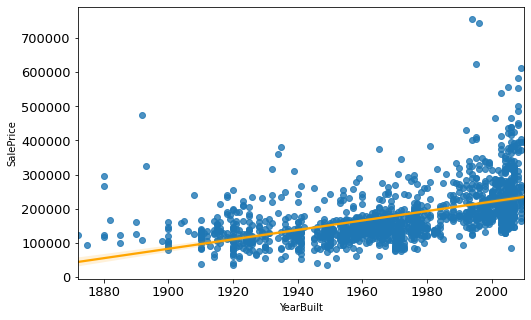

In [58]:
# Scatter Plot of YearBuilt

col_x = 'YearBuilt'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim(0, 11)
plt.show()

<h5 style = 'color:blue'> Moderately increasing trend. Age of the property can be derived from this variable.

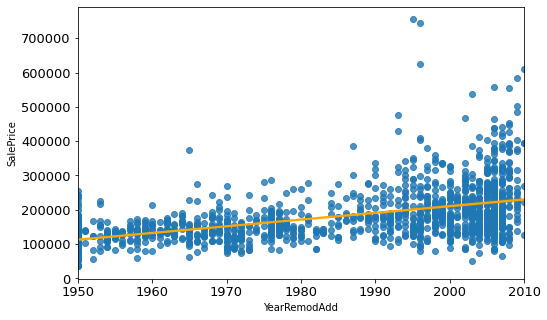

In [59]:
# Scatter Plot of YearRemodAdd    

col_x = 'YearRemodAdd'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim(0, 11)
plt.show()

<h5 style = 'color:blue'> Moderately increasing trend. Age since remodeling can be derived from this variable.

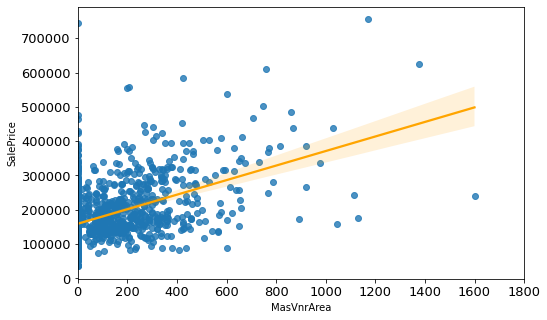

In [60]:
# Scatter Plot of MasVnrArea    

col_x = 'MasVnrArea'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 1800)
plt.show()

<h5 style = 'color:blue'> Moderately increasing trend. 

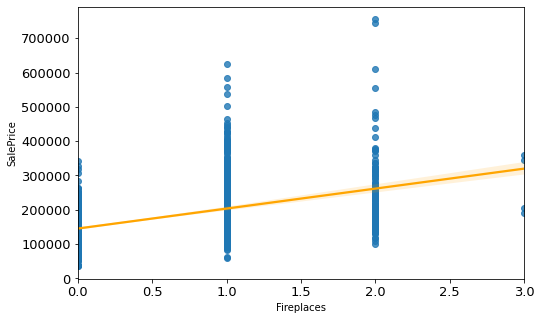

In [61]:
# Scatter Plot of Fireplaces 

col_x = 'Fireplaces'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim(0, 1800)
plt.show()

<h5 style = 'color:blue'> Moderately increasing trend. 

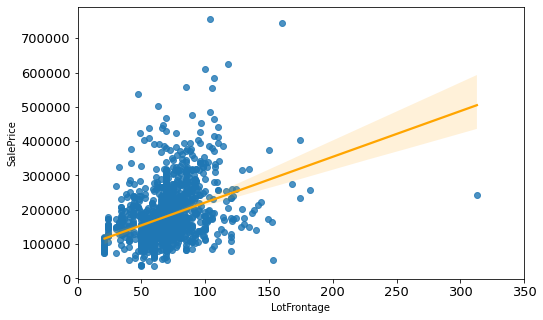

In [62]:
# Scatter Plot of LotFrontage    

col_x = 'LotFrontage'
plt.figure(figsize=[8,5])
sns.regplot(data=df, x=col_x, y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 350)
plt.show()

In [63]:
# Drop the 1 suspicious looking properties with high Lot Frontage area but low saleprice

df.drop(df[df.LotFrontage >= 300].index, inplace=True)
df.shape

(1453, 77)

In most of the correlations, the 2 datapoints with high SalePrice stand out as outliers. Though it is desirable to keep them, the number of datapoints in this SalePrice > 700k is very few to make any reliable decision. Therefore they can be dropped.

In [64]:
# Drop the 2 properties with SalePrice > 700k

df.drop(df[df.SalePrice >= 700000].index, inplace=True)
df.shape

(1451, 77)

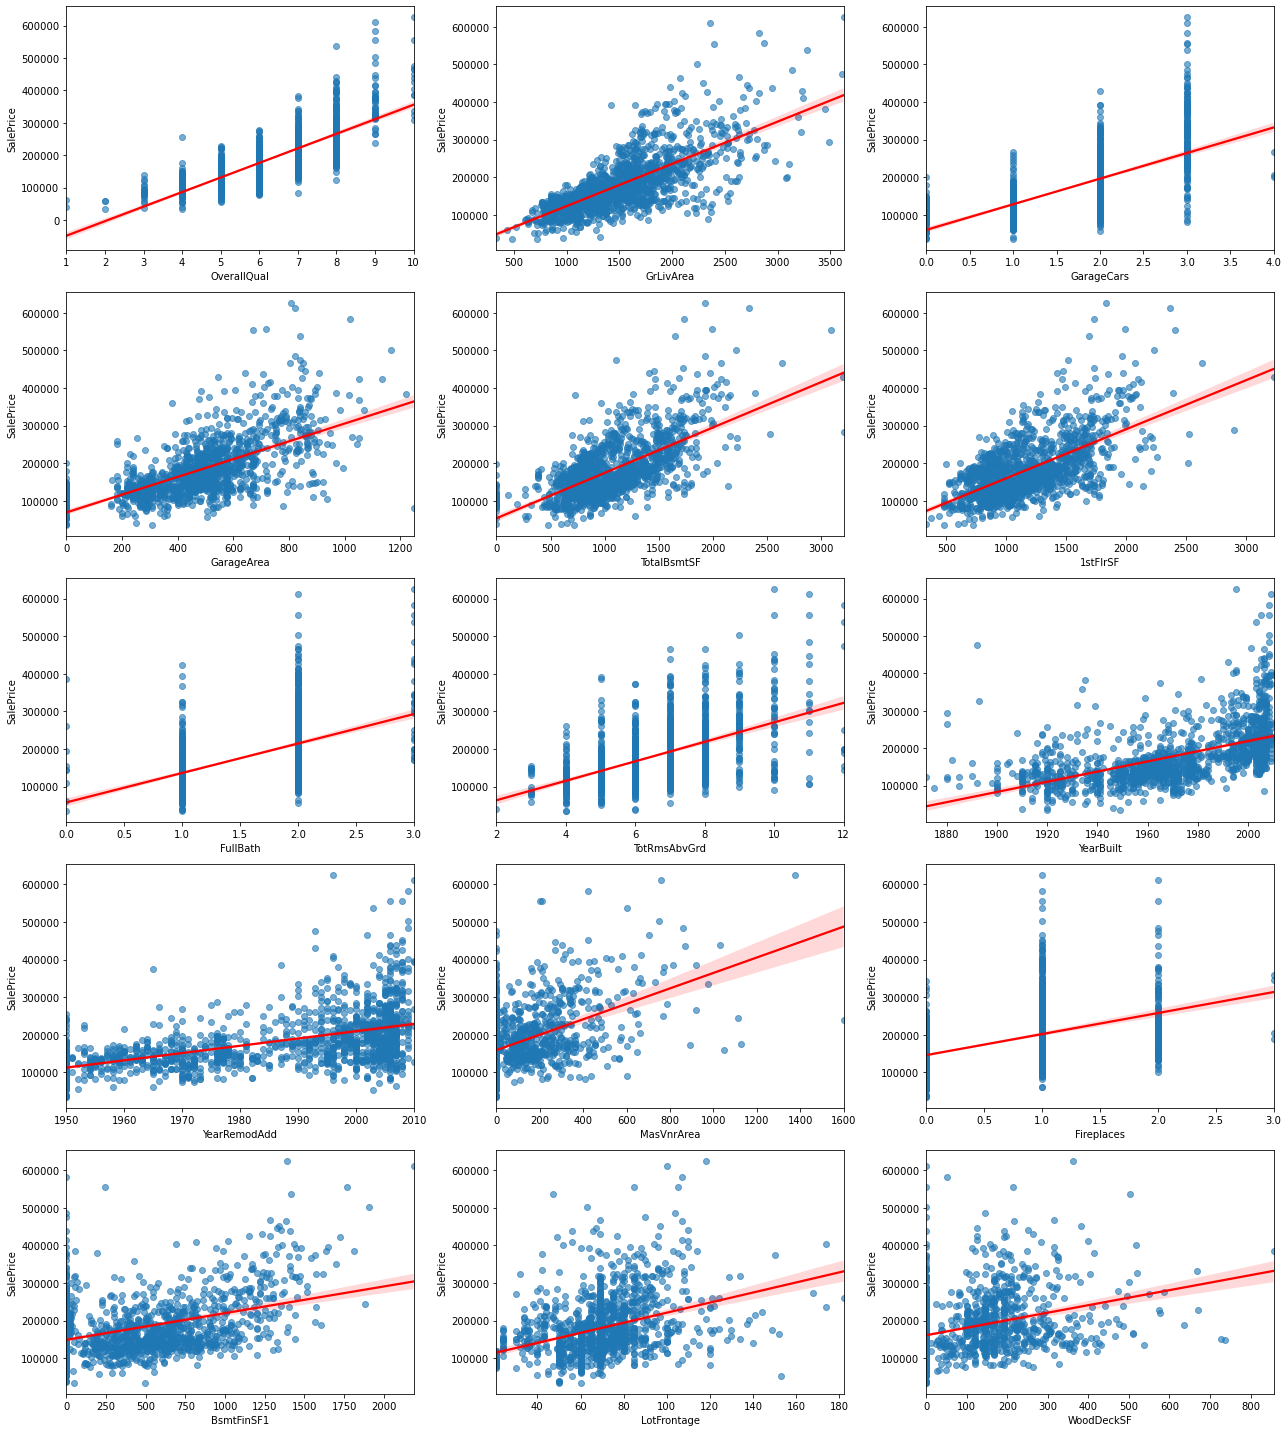

In [65]:
# Replot of Reg plot of top-15 correlated variables with SalePrice

plt.figure(figsize=[18,20])

for i in range(1,16,1):
    plt.subplot(5,3,i)
    sns.regplot(data=df, x=df_corr.index[i], y='SalePrice',scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

### Box Plots of Top-15 Correlation variables with SalePrice

In [66]:
# Function to plot box

def Box_Plotter (df):
    plt.style.use('seaborn')
    %matplotlib inline
    font1 = 22
    font2 = 18
    font3 = 14
    fig = plt.figure(figsize = (18,18))
    #fig.suptitle('Box Plots', fontsize=font1)
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, df.columns[0:].shape[0])))
    for ii in enumerate(df.columns[0:]):
        ax1 = fig.add_subplot(3, 5, ii[0]+1)
        plt.subplot(ax1)
        sns.boxplot(data = df, y=[ii[1]], color=next(colors))
        plt.xlabel(ii[1], fontsize=font3)
    plt.tight_layout()
    plt.show()
    return

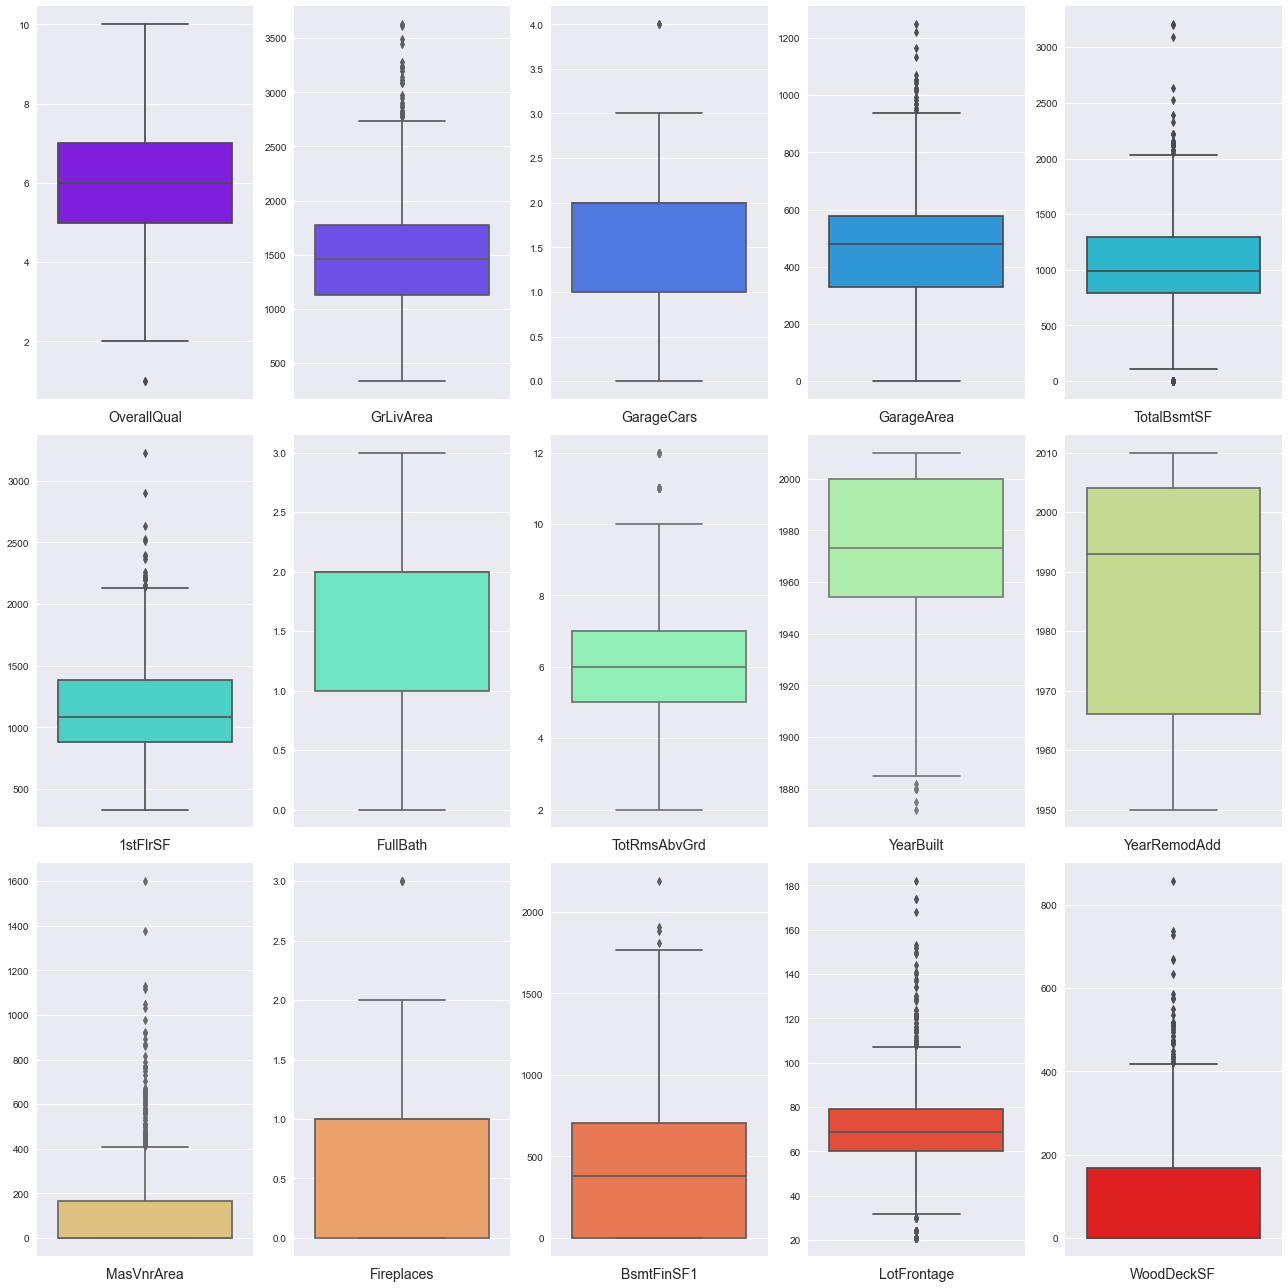

In [67]:
Box_Plotter(df[df_corr.index[1:16]])

In [68]:
df.shape

(1451, 77)

<h5 style = 'color:blue'> Only 9 rows dropped out of 1460. Top-15 correlating variables with SalePrice looks quite stable. Lets move forward.

## Step-3.2: EDA of Categorical Variables 

In [69]:
# These are the categorical variables present in the dataset

str_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

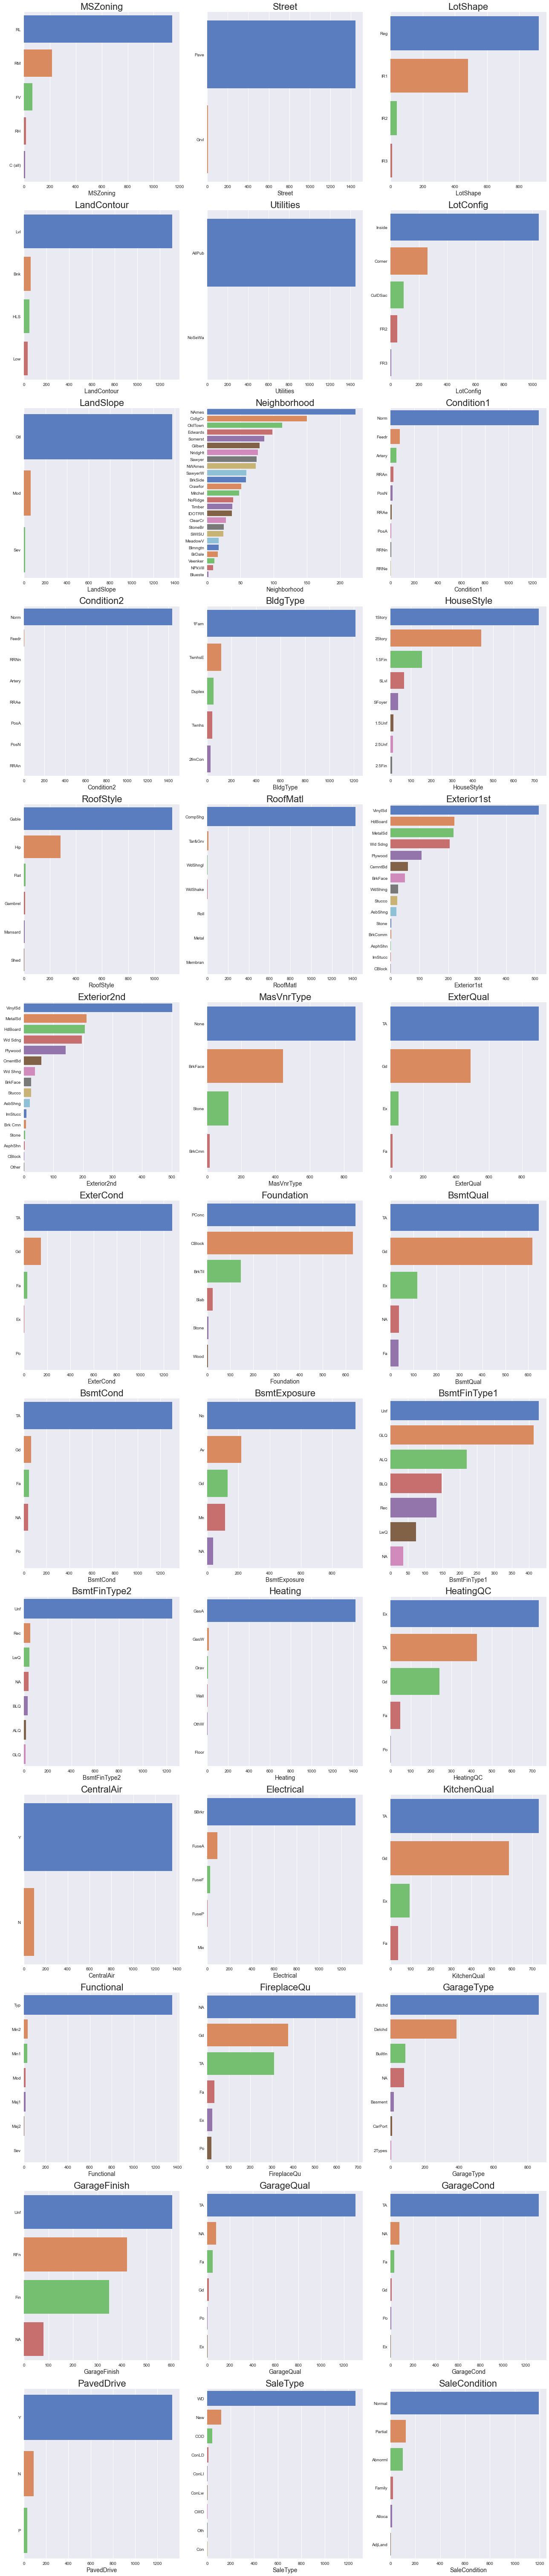

In [70]:
# Bar Charts to check counts to check for skewness & imbalance in categorical Variables

plt.style.use('seaborn')
%matplotlib inline
font1 = 22
font2 = 18
font3 = 14
fig = plt.figure(figsize = (18,6*14))
for ii in enumerate(str_cols):
    ax1 = fig.add_subplot(13, 3, ii[0]+1)
    plt.subplot(ax1)
    data = df[ii[1]].value_counts()
    sns.barplot(y = data.index, x = data, orient='h', palette='muted')
    plt.xlabel(ii[1], fontsize=font3)
    plt.title(ii[1], fontsize=font1)
plt.tight_layout()
plt.show()

<h5 style = 'color:blue'> Based on highly skewed categorical data and/or some columns seem to be duplicate information, the following are identified to be dropped.

In [71]:
# Columns to be dropped due to skew, duplication etc.

drop_cols = ['Street','Utilities','LandContour','LandSlope','Condition2',
             'RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','Functional']

df.drop(columns=drop_cols, inplace=True)
df.shape

(1451, 66)

In [72]:
# Updated string Variables in the data after dropping

str_cols = df.columns[df.dtypes =='object']

### Box Plots with SalePrice on Y Axis and Categorical Variables on X axis

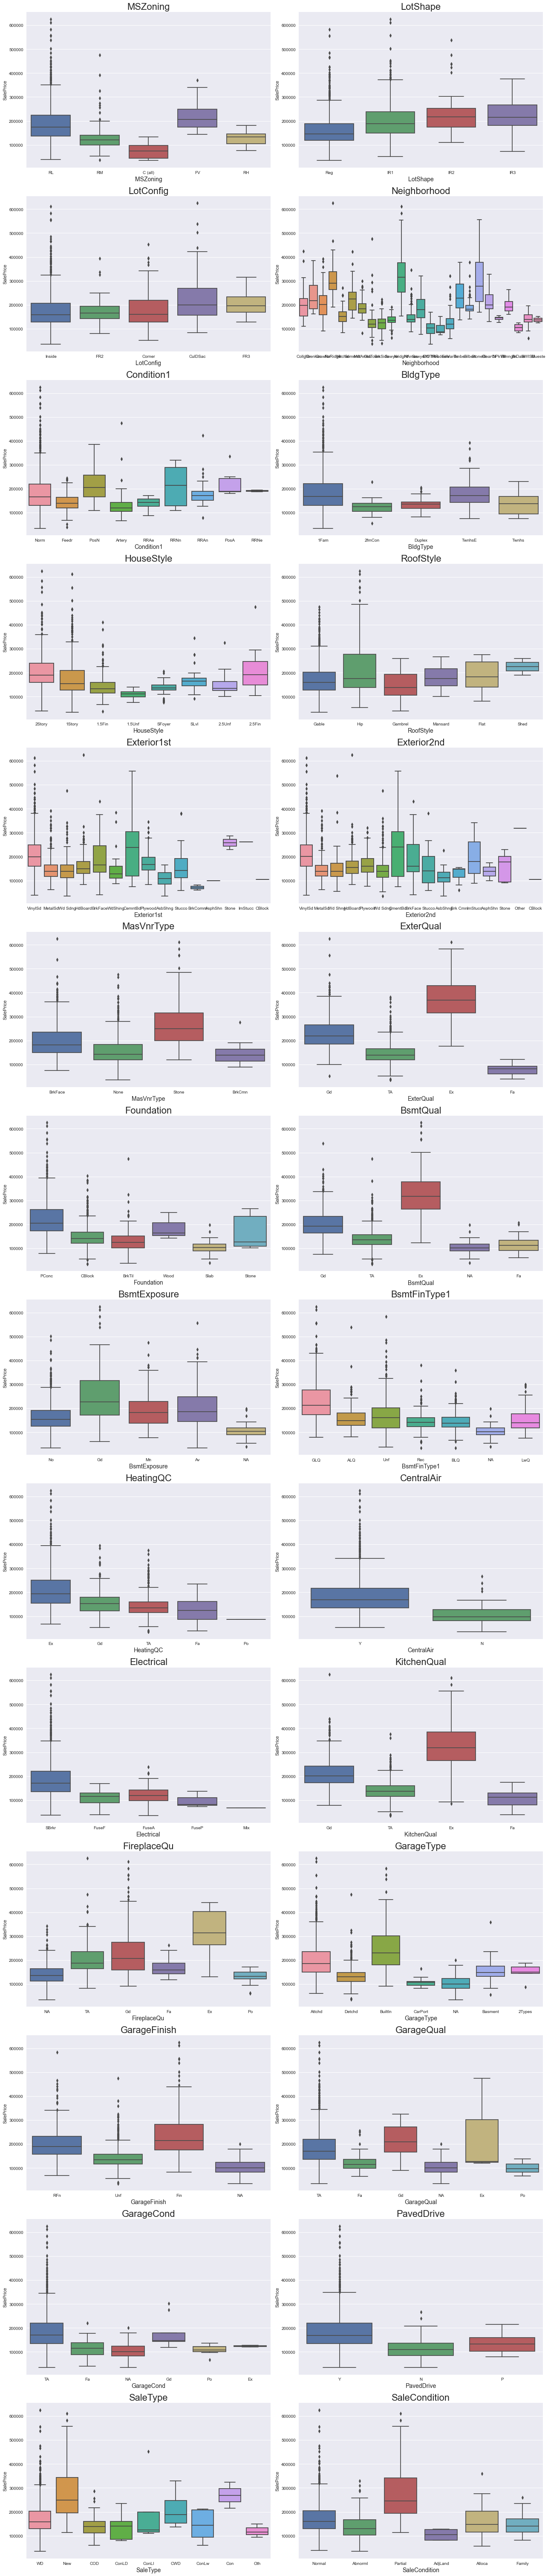

In [73]:
# Data Viz for Categorical Variables with focus on SalePrice

plt.style.use('seaborn')
%matplotlib inline
font1 = 22
font2 = 18
font3 = 14
fig = plt.figure(figsize = (18,6*14))
for ii in enumerate(str_cols):
    ax1 = fig.add_subplot(14, 2, ii[0]+1)
    plt.subplot(ax1)
    sns.boxplot(data = df, y='SalePrice', x=ii[1])
    plt.xlabel(ii[1], fontsize=font3)
    plt.title(ii[1], fontsize=font1)
plt.tight_layout()
plt.show()

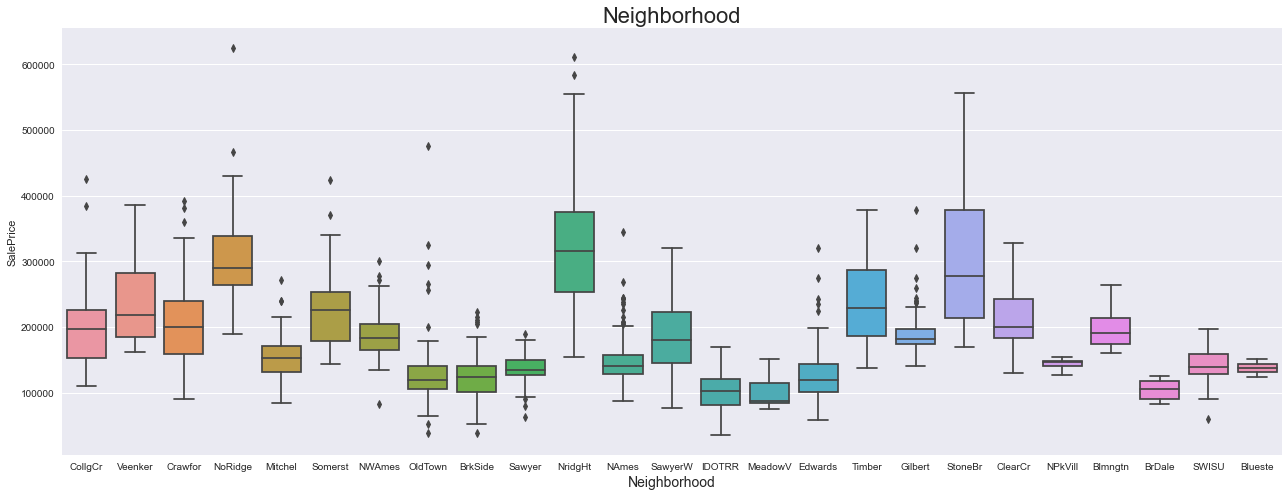

In [74]:
# Data Viz for Neighborhood with focus on SalePrice

plt.style.use('seaborn')
%matplotlib inline
font1 = 22
font2 = 18
font3 = 14
fig = plt.figure(figsize = (18,7))
sns.boxplot(data = df, y='SalePrice', x='Neighborhood')
plt.xlabel('Neighborhood', fontsize=font3)
plt.title('Neighborhood', fontsize=font1)
plt.tight_layout()
plt.show()

<h5 style = 'color:blue'> The following categories have higher SalePrice compared to rest.

<h5 style = 'color:blue'> A few ideas for new metrics or transformations

## Step-4: Preparation for Modeling

In [75]:
# Shape of dataset after EDA

df.shape

(1451, 66)

## Step-4.1: New Metrics

In [76]:
# Datetime module

import datetime
datetime.datetime.now().year

2021

In [77]:
# Create new variable: Age_since_built

df['Age_since_built'] = datetime.datetime.now().year - df['YearBuilt']

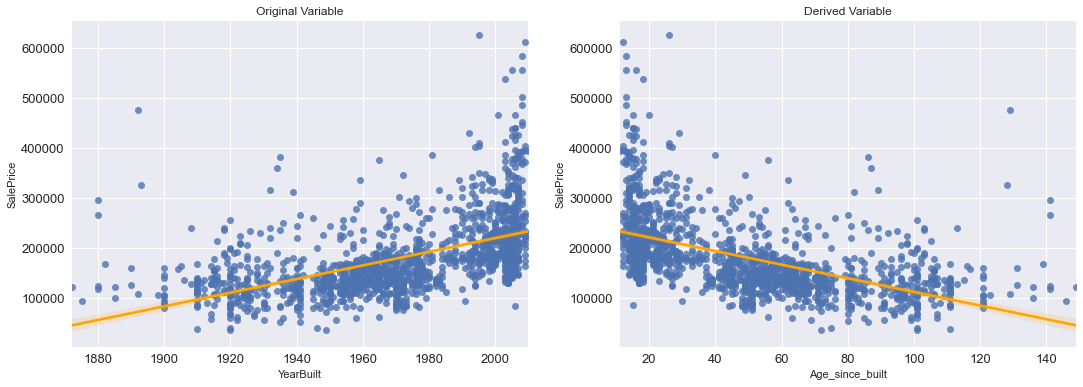

In [78]:
# Scatter Plot of Age_since_built

plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sns.regplot(data=df, x='YearBuilt', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Original Variable')

plt.subplot(1,2,2)
sns.regplot(data=df, x='Age_since_built', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Derived Variable')

plt.show()

<h5 style = 'color:blue'> Looks like it captures information from YearBuilt with more meaniningfull column understanding.

In [79]:
# Drop YearBuilt

df.drop(columns='YearBuilt', inplace = True)
df.shape

(1451, 66)

In [80]:
# Create new variable: Age_since_remod

df['Age_since_remod'] = datetime.datetime.now().year - df['YearRemodAdd']

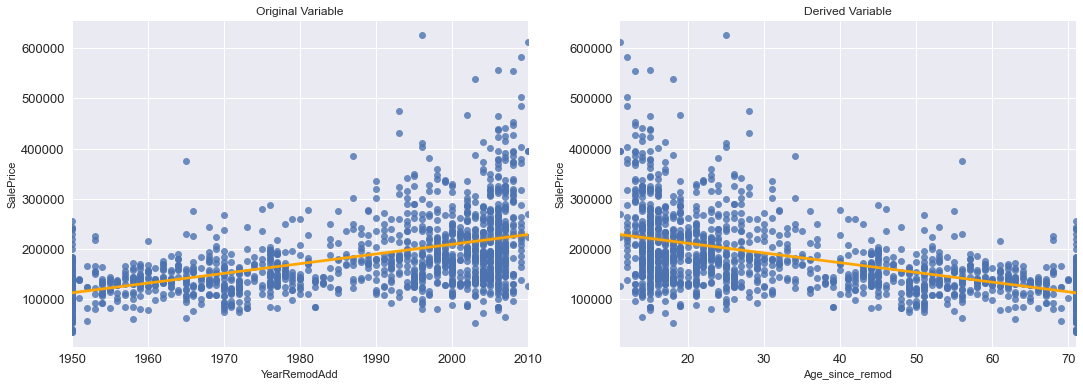

In [81]:
# Scatter Plot of Age_since_remod

plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sns.regplot(data=df, x='YearRemodAdd', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Original Variable')

plt.subplot(1,2,2)
sns.regplot(data=df, x='Age_since_remod', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Derived Variable')

plt.show()

<h5 style = 'color:blue'> Looks like it captures information from YearRemodAdd with more meaniningfull column understanding.

In [82]:
# Drop YearRemodAdd

df.drop(columns='YearRemodAdd', inplace = True)
df.shape

(1451, 66)

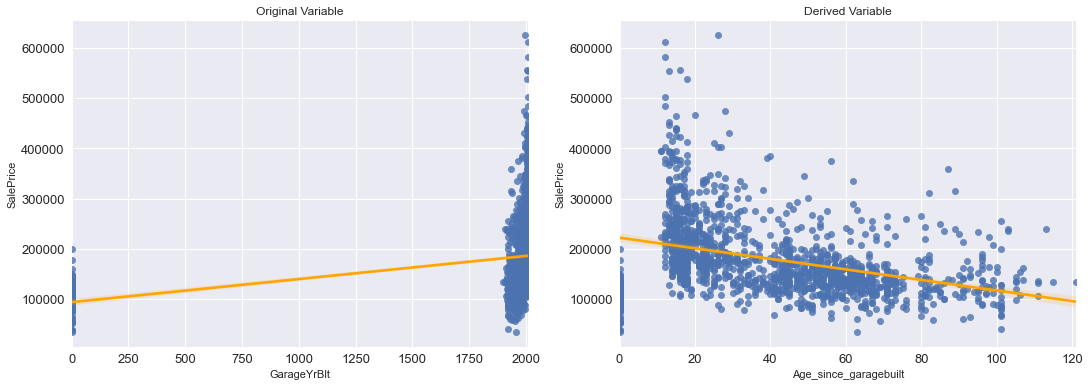

In [83]:
# Create new variable: Age_since_garagebuilt

df['Age_since_garagebuilt'] = datetime.datetime.now().year - df['GarageYrBlt']
df['Age_since_garagebuilt'][df['Age_since_garagebuilt'] == datetime.datetime.now().year] = 0

# Scatter Plot of Age_since_garagebuilt
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sns.regplot(data=df, x='GarageYrBlt', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Original Variable')

plt.subplot(1,2,2)
sns.regplot(data=df, x='Age_since_garagebuilt', y='SalePrice', line_kws={'color': 'orange'})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Derived Variable')

plt.show()

<h5 style = 'color:blue'> Looks like it captures information from GarageYrBlt with more meaniningfull column understanding.

In [84]:
# Drop GarageYrBlt
df.drop(columns='GarageYrBlt', inplace = True)
df.shape

(1451, 66)

We see that a few variables need some clean up. Lets do it now.

In [85]:
# Drop Id

df.drop(columns='Id', inplace=True)

In [86]:
# MoSold, YearSold

df[['SalePrice', 'MoSold', 'YrSold']].corr()

,SalePrice,MoSold,YrSold
SalePrice,1.000000,0.055619,-0.024660
MoSold,0.055619,1.000000,-0.148292
YrSold,-0.024660,-0.148292,1.000000


<h5 style = 'color:blue'> 'MoSold', 'YrSold' Poor correlation to SalePrice. Can be dropped.

In [87]:
# Drop 'MoSold', 'YrSold'

df.drop(columns=['MoSold', 'YrSold'], inplace=True)
df.shape

(1451, 63)

In [88]:
# final numerical Variables in the data

num_cols_final = list(df.columns[df.dtypes !='object'])
num_cols_final.remove('SalePrice')

<h5 style = 'color:blue'> Clean and prepared data ready for dummy variables creation.

## Step-4.2: Dummy Variables

Lets convert binary Yes No to 1 and 0

In [89]:
# Before Binary Mapping

df['CentralAir'].value_counts()

Y    1356
N      95
Name: CentralAir, dtype: int64

In [90]:
# Converting binary variables (Yes/No) to 1/0

binList =  ['CentralAir']
df[binList] = df[binList].apply(lambda x: x.map({'Y': 1, "N": 0}))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age_since_built,Age_since_remod,Age_since_garagebuilt
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NA,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,18,18,18.0
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,45,45,45.0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,20,19,20.0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,106,51,23.0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,21,21,21.0


In [91]:
# After Binary Mapping

df['CentralAir'].value_counts()

1    1356
0      95
Name: CentralAir, dtype: int64

In [92]:
# string Variables in the data

str_cols = list(df.columns[df.dtypes =='object'])

Lets do One-Hot Encoding for categorical variables with multiple levels

In [93]:
# Dummy Variables with drop_first set as true

df_dummy = pd.get_dummies(df[str_cols], drop_first=True)
df_dummy.shape

(1451, 163)

In [94]:
# Concatenation & create a new dataframe

df_new = pd.concat([df, df_dummy], axis=1)
df_new.shape

(1451, 226)

In [95]:
# Drop Object type columns

df_new.drop(columns= str_cols, inplace=True)
df_new.shape

(1451, 199)

In [96]:
# Check the dataframe

df_new.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age_since_built,Age_since_remod,Age_since_garagebuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,18,18,18.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,45,45,45.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1

<h5 style = 'color:blue'> Dummy variables are created and we have a dataframe with numeric values only

## Step-4.3: Train Test Split

In [97]:
# X and y

y = df_new.pop('SalePrice')
X = df_new

In [98]:
# Perform Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.7, random_state=42)

In [99]:
# Check if size is correct

print ('Train Size: ', X_train.shape, y_train.shape)
print ('Test Size: ', X_test.shape, y_test.shape)

Train Size:  (1015, 198) (1015,)
Test Size:  (436, 198) (436,)


## Step-4.4: Scaling

In [100]:
# Select a scaler
# Let us go with MinMaxScaler because it makes all the variables into 0 and 1 range. 
# Therefore the dummy variables will be in same range as other numerical variables
# And the coeffients of the regression model will be comparable to each other.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()

In [101]:
# Perform scaling on X_train, only the numeric columns and not the dummy variables

X_train[num_cols_final] = scaler.fit_transform(X_train[num_cols_final])
X_train.shape

(1015, 198)

In [102]:
# Perform scaling on X_test

X_test[num_cols_final] = scaler.transform(X_test[num_cols_final])
X_test.shape

(436, 198)

In [103]:
# X_train head

X_train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age_since_built,Age_since_remod,Age_since_garagebuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
714,0.235294,0.298137,0.057103,0.555556,0.875,0.209724,0.243601,0.0,0.082192,0.226562,1,0.102867,0.414741,0.0,0.326435,0.0,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.000000,0.5,0.380609,0.0,0.080439,0.0,0.0,0.0,0.0,0.0,0.246377,0.083333,0.371901,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
623,0.823529,0.298137,0.003819,0.555556,0.500,0.372279,0.191956,0.0,0.143836,0.236250,1,0.113978,0.415842,0.0,0.336783,0.0,0.0,0.666667,0.5,0.333333,0.0,0.111111,0.333333,0.5,0.352564,0.0,0.058501,0.0,0.0,0.0,0.0,0.0,0.072464,0.166667,0.173554,

In [104]:
# X_test head

X_test.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age_since_built,Age_since_remod,Age_since_garagebuilt,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
539,0.000000,0.298137,0.047316,0.777778,0.5,0.347605,0.620658,0.0,0.095462,0.494063,1,0.416846,0.000000,0.0,0.364691,0.333333,0.0,0.666667,0.0,0.5,0.0,0.333333,0.333333,0.5,0.536859,0.210035,0.0,0.0,0.0,0.0,0.0,0.240964,0.065217,0.133333,0.165289,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
758,0.823529,0.018634,0.004581,0.666667,0.5,0.261248,0.250914,0.0,0.083476,0.232500,1,0.114337,0.409241,0.0,0.333333,0.000000,0.0,0.666667,0.5,0.5,0.0,0.333333,0.000000,0.5,0.352564,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.079710,0.183333,0.1

<h5 style = 'color:blue'> Data is ready for modeling.

## Step-5: Regression Model without Regularization

Lets try a couple of linear regression model without regularization with few variables to see how the data behaves.

## Step-5.1: Model-1 - Influence of Overall Quality and Living Area on SalePrice

Lets understand what effect Overallqual and GrLivArea has on the regression with SalePrice.

In [105]:
# Linear Regression Model, prediction for training data set and output r2_score for training data set

# Linear Regression Model with 'OverallQual'
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression()
lr_1.fit(X_train[['OverallQual', 'GrLivArea']], y_train)

# Prediction for training dataset
y_train_pred = lr_1.predict(X_train[['OverallQual','GrLivArea']])

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with only OverallQual and GrLivArea as parameter = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with only OverallQual and GrLivArea as parameter = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,2))

R2 Score for Training Dataset with only OverallQual and GrLivArea as parameter =  0.74
RMSE Score for Training Dataset with only OverallQual and GrLivArea as parameter =  40776.21


In [106]:
# Prediction for test dataset
y_test_pred = lr_1.predict(X_test[['OverallQual','GrLivArea']])

# r2 score for test dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with only OverallQual and GrLivArea as parameter = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for test dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with only OverallQual and GrLivArea as parameter = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,2))

R2 Score for Test Dataset with only OverallQual and GrLivArea as parameter =  0.74
RMSE Score for Test Dataset with only OverallQual and GrLivArea as parameter =  35197.32


<h5 style = 'color:blue'> Just 2 variables: OverallQual and GrLivArea can give us r2 score of 0.74. No overfitting visible with test data r2 = train data r2.

In [107]:
# Function to retun a list with metrics

def get_metrics_list (y_train, y_train_pred, y_test, y_test_pred):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    op_list = []
    op_list.append(round(r2_score(y_train, y_train_pred),2)) # R2 Score Train
    op_list.append(round(r2_score(y_test, y_test_pred),2)) # R2 Score Test
    op_list.append(round(mean_squared_error(y_train, y_train_pred)**0.5,2))  # RMSE Score Train
    op_list.append(round(mean_squared_error(y_test, y_test_pred)**0.5,2))  # RMSE Score Test
    return op_list

In [108]:
# Store the metrics
linear_regression_model1_metrics = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

## Step-5.2: Model-2 - with 5 to 10 parameters

In [109]:
# We will select a few variables based on correlations we saw earlier

model_cols = ['OverallQual','Age_since_remod',
              'GrLivArea', 'GarageArea', 'MasVnrArea','LotFrontage',
              'KitchenAbvGr','Fireplaces']

len(model_cols)

8

In [110]:
# Linear Regression Model, prediction for training data set and output r2_score for training data set

# Linear Regression Model with selected columns
from sklearn.linear_model import LinearRegression
reg_obj = LinearRegression()
reg_obj.fit(X_train[model_cols], y_train)

# Prediction for training dataset
y_train_pred = reg_obj.predict(X_train[model_cols])

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset = ', round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset = ', round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,2))

R2 Score for Training Dataset =  0.8
RMSE Score for Training Dataset =  35275.4


In [111]:
# This is a custom function to calculate VIF
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [112]:
# VIF of X_train
vif = calc_VIF(X_train[model_cols])
vif

,Features,VIF
0,OverallQual,16.09
2,GrLivArea,11.09
3,GarageArea,9.92
5,LotFrontage,7.45
7,Fireplaces,2.59
1,Age_since_remod,2.05
4,MasVnrArea,1.66
6,KitchenAbvGr,1.18


<h5 style = 'color:blue'> With just 8 parameters plus 1 intercept we are getting 0.8 r2 score on training set. VIF is greater than 10. Regularization should be done.

## Step-5.3: Evaluation with Model-2

In [113]:
# Prediction for test dataset
y_test_pred = reg_obj.predict(X_test[model_cols])

# r2 score for test dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset = ', round(r2_score(y_test, y_test_pred),2))

# RMSE score for test dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset = ', round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,2))

R2 Score for Test Dataset =  0.8
RMSE Score for Test Dataset =  30572.18


<h5 style = 'color:blue'> r2 score of train and test data set is equal at 0.8. This suggests there is no overfitting. RMSE is about 30 k$.

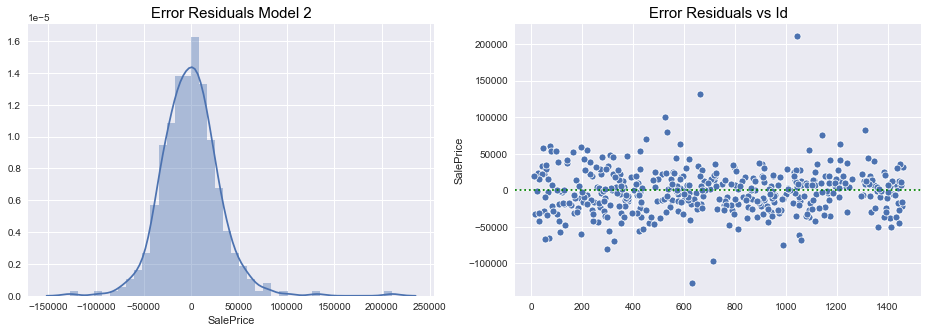

In [114]:
# Residual of model-3
res_model_3 = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_3, bins=40)
plt.title('Error Residuals Model 2', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_3)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> Residuals are normally distributed and the indepenence of residual is largely good.

In [115]:
# Store the metrics
linear_regression_model2_metrics = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

Lets see if we can improve the model with regularization techniques.

## Step-6: Ridge Regression with Regularization

## Step-6.1: Model-3

In [116]:
# Hyperparameter Selection = Alpha which is the regularization coefficient of Ridge

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 
                         0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                         2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                         20, 30, 40, 50, 75, 100, 
                         200, 300, 400, 500, 750, 1000 ]}

In [117]:
# Setting up Ridge object

from sklearn.linear_model import Ridge
ridge = Ridge()

In [118]:
# Setting up the Cross Validation

from sklearn.model_selection import GridSearchCV
numFold = 5

grid_search_cv = GridSearchCV(param_grid=hyper_param,
                             estimator=ridge,
                             scoring='neg_root_mean_squared_error',
                             cv=numFold,
                              return_train_score=True,
                              verbose = 1)

In [119]:
# Check size before sending to the solver.

print (X_train.shape, y_train.shape)

(1015, 198) (1015,)


In [120]:
# Running the Cross Validation
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    5.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 75,
                                   100, 200, 300, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [121]:
# Printing the best hyperparameter alpha
print(grid_search_cv.best_params_)

{'alpha': 2.0}


Grid Search outputs an optimum alpha value of 2

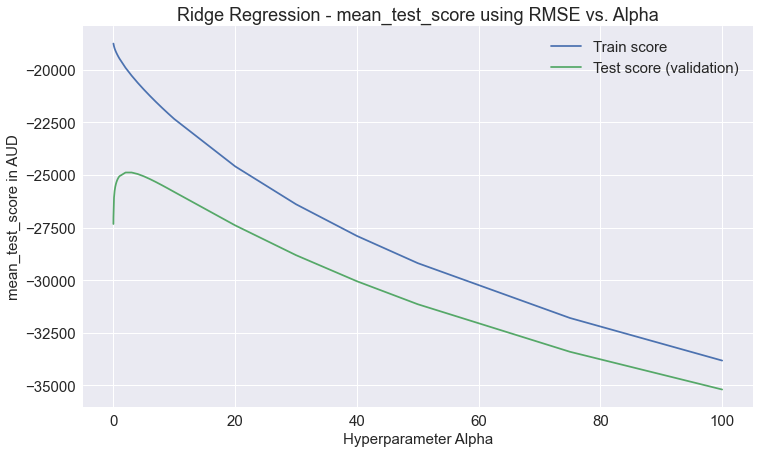

In [122]:
# Create dataframe of the results

df_grid_search_cv = pd.DataFrame(grid_search_cv.cv_results_)

# Visualization of the results
cut_off_alpha_plot = 100
plt.figure(figsize=(12,7))
sns.lineplot(data= df_grid_search_cv[df_grid_search_cv['param_alpha']<=cut_off_alpha_plot], 
             x='param_alpha', y='mean_train_score')
sns.lineplot(data= df_grid_search_cv[df_grid_search_cv['param_alpha']<=cut_off_alpha_plot], 
             x='param_alpha', y='mean_test_score')
plt.title("Ridge Regression - mean_test_score using RMSE vs. Alpha", fontsize=18)
plt.legend(['Train score', 'Test score (validation)'], loc='best', fontsize=15)

plt.xlabel('Hyperparameter Alpha',fontsize=15 )
plt.ylabel('mean_test_score in AUD',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [123]:
# Ridge model for alpha = 2 and printing coefficients which have been penalised

alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [124]:
# Training Set Predictions
y_train_pred = ridge.predict(X_train)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with Ridge Regression = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with Ridge Regression = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,1))

R2 Score for Training Dataset with Ridge Regression =  0.94
RMSE Score for Training Dataset with Ridge Regression =  20333.0


## Step-6.2: Evaluation of Ridge Regression

In [125]:
# Test Set Predictions
y_test_pred = ridge.predict(X_test)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with Ridge Regression = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with Ridge Regression = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,1))

R2 Score for Test Dataset with Ridge Regression =  0.91
RMSE Score for Test Dataset with Ridge Regression =  20854.8


<h5 style = 'color:blue'> With Ridge Regression regularization, the r2 score of train and test data set is equal at 0.94 and 0.91 respectively. RMSE is about 21 k$.

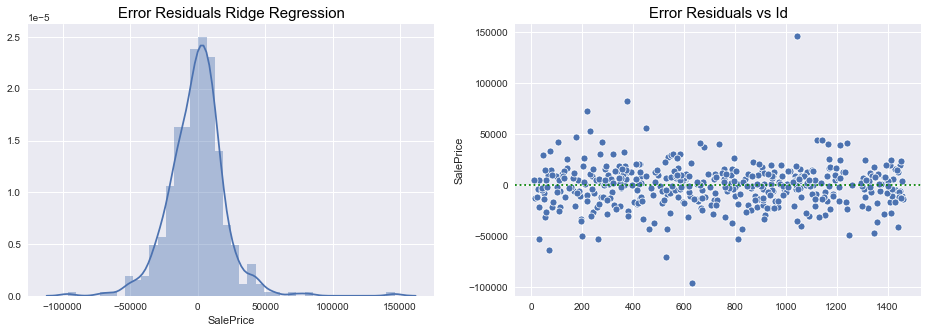

In [126]:
# Residual of Ridge Regression Model
res_model_ridge = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_ridge, bins=40)
plt.title('Error Residuals Ridge Regression', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_ridge)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> Residuals are normally distributed and the indepenence of residual is good.

In [127]:
# Store the metrics

ridge_regression_metrics = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

In [128]:
# Lets look at coefficients from Ridge Regression model

np.set_printoptions()
ridge.coef_

array([-13883.47047283,   8336.13491106,  38925.08830228,  62709.03147645,
        44148.07249665,  34449.60740383,  51274.12185244,  12499.19720579,
        15257.67822174,  50598.84693439,   2633.93500234,  45417.40434321,
        44624.72241364,  -2050.91840604,  64806.89185867,  10165.3620654 ,
        -8856.27022523,  16099.57352416,   9600.89442888, -15783.05627033,
       -24884.12439177,  26642.53439151,  12720.98182789,  22155.41449579,
        20300.54826011,  15745.72185038,   8937.37432623,   4351.65413968,
        16320.97426363,  15290.19016541,  15171.45301568,  -4677.53057275,
       -25648.68160683,  -2627.15945361,  -3350.12956783,  13085.12213146,
        12105.39635424,   7915.07310299,   4428.5022271 ,  10798.78017123,
        13389.08605916,   2116.3437847 ,  13140.99249923,  -6521.47992944,
        -1373.7965663 ,     87.0801527 ,    988.67924588,   4338.65520529,
         3088.55738415,  -5673.39764646,  -6640.07422377,  18781.80800361,
       -12567.6530452 ,  

Let us store parameters are generated by Ridge Regularization

In [129]:
# Ridge Model column names
col_names = list(X_train.columns)
col_names.insert(0, "Intercept")

# Ridge Model Parameter Values
param_values = list(ridge.coef_)
param_values.insert(0, ridge.intercept_)

# Ridge Model - unified list
ridge_parameters = list(zip(col_names, np.round(param_values,1)))

In [130]:
# Check the number of non zero parameters from Ridge

print ('Number of parameters from Ridge = ', len(ridge_parameters))

Number of parameters from Ridge =  199


## Step-7: Lasso Regression with Regularization

## Step-7.1: Modeling

In [131]:
# Hyperparameter Selection = Alpha which is the regularization coefficient of Ridge

hyper_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 
                         0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                         2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                         20, 30, 40, 50, 75, 100, 
                         150, 300, 400, 500, 750, 1000 ]}

In [132]:
# Setting up Lasso object

from sklearn.linear_model import Lasso
lasso = Lasso()

In [133]:
# Setting up the Cross Validation

from sklearn.model_selection import GridSearchCV
numFold = 5

grid_search_cv = GridSearchCV(param_grid=hyper_param,
                             estimator=lasso,
                             scoring='neg_root_mean_squared_error',
                             cv=numFold,
                              return_train_score=True,
                              verbose = 1)

In [134]:
# Check size before sending to the solver.

print (X_train.shape, y_train.shape)

(1015, 198) (1015,)


In [135]:
# Running the Cross Validation
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:   52.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 75,
                                   100, 150, 300, ...]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [136]:
# Printing the best hyperparameter alpha
print(grid_search_cv.best_params_)

{'alpha': 75}


Grid Search outputs an optimum alpha value of 75

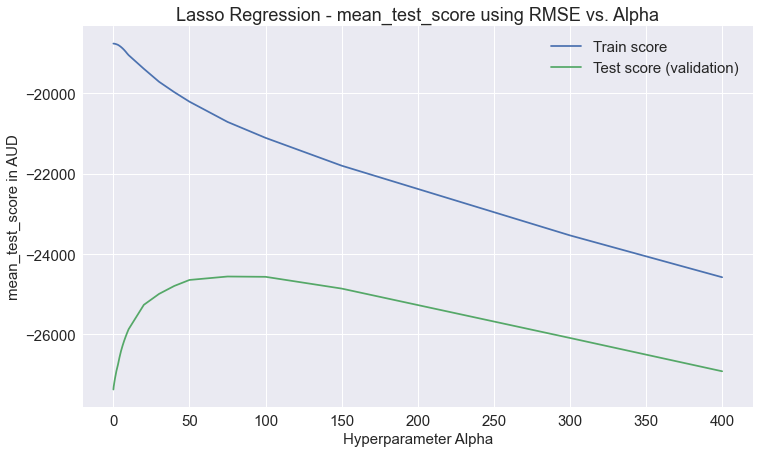

In [137]:
# Create dataframe of the results

df_grid_search_cv = pd.DataFrame(grid_search_cv.cv_results_)

# Visualization of the results
cut_off_alpha_plot = 400
plt.figure(figsize=(12,7))
sns.lineplot(data= df_grid_search_cv[df_grid_search_cv['param_alpha']<=cut_off_alpha_plot], 
             x='param_alpha', y='mean_train_score')
sns.lineplot(data= df_grid_search_cv[df_grid_search_cv['param_alpha']<=cut_off_alpha_plot], 
             x='param_alpha', y='mean_test_score')
plt.title("Lasso Regression - mean_test_score using RMSE vs. Alpha", fontsize=18)
plt.legend(['Train score', 'Test score (validation)'], loc='best', fontsize=15)

plt.xlabel('Hyperparameter Alpha',fontsize=15 )
plt.ylabel('mean_test_score in AUD',fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [138]:
# Lasso model for alpha = 75 and printing coefficients which have been penalised

alpha = 75
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=75)

In [139]:
# Training Set Predictions
y_train_pred = lasso.predict(X_train)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with Lasso Regression = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,1))

R2 Score for Training Dataset with Lasso Regression =  0.93
RMSE Score for Training Dataset with Lasso Regression =  21182.1


## Step-6.2: Evaluation of Lasso Regression

In [140]:
# Test Set Predictions
y_test_pred = lasso.predict(X_test)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with Lasso Regression = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,1))

R2 Score for Test Dataset with Lasso Regression =  0.91
RMSE Score for Test Dataset with Lasso Regression =  20688.5


<h5 style = 'color:blue'> With Lasso Regression regularization, the r2 score of train and test data set is equal at 0.93 and 0.91 respectively. RMSE is about 20 k$.

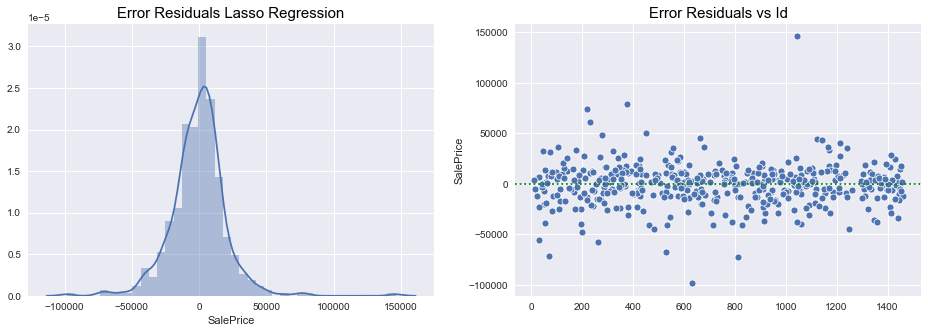

In [141]:
# Residual of Ridge Regression Model
res_model_lasso = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_lasso, bins=40)
plt.title('Error Residuals Lasso Regression', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_lasso)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> Residuals are normally distributed and the indepenence of residual is good.

In [142]:
# Store the metrics

lasso_regression_metrics = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

In [143]:
# Lets look at coefficients from Lasso Regression model

np.set_printoptions()
lasso.coef_

array([-1.37047681e+04,  3.66395930e+02,  5.05368026e+04,  8.13244394e+04,
        5.08734861e+04,  3.46872536e+04,  4.07579170e+04,  1.75706565e+03,
       -0.00000000e+00,  7.23103170e+04,  0.00000000e+00,  0.00000000e+00,
        5.20462910e+03, -0.00000000e+00,  1.46371113e+05,  5.89125408e+03,
       -6.42719601e+03,  4.89383002e+03,  6.62747008e+03, -8.52108428e+03,
       -2.14842094e+04,  1.33082186e+04,  5.78680115e+03,  2.10852641e+04,
        1.75365924e+04,  1.24662230e+04,  2.24995225e+03,  0.00000000e+00,
        2.51992212e+02,  1.15753314e+04,  0.00000000e+00, -0.00000000e+00,
       -3.46903770e+04, -2.27775511e+03, -1.59742513e+03,  5.22814487e+03,
        0.00000000e+00,  0.00000000e+00, -3.89275956e+03,  6.39358220e+03,
        1.79436116e+03,  1.42345009e+03,  1.13817130e+04, -2.81407800e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.15476385e+03, -0.00000000e+00, -2.30597401e+02,  2.12282972e+04,
       -4.24042296e+03, -

<h5 style = 'color:blue'> Lasso regression makes many coefficients 0. This is the strength of Lasso regularization.

Let us find how many non zero parameters are generated by Lasso Regularization

In [144]:
# Lasso Model column names
col_names = list(X_train.columns)
col_names.insert(0, "Intercept")

# Lasso Model Parameter Values
param_values = list(lasso.coef_)
param_values.insert(0, lasso.intercept_)

# Lasso Model - unified list
lasso_parameters = list(zip(col_names, np.round(param_values,1)))
lasso_non_zero_parameters = [row for row in lasso_parameters if abs(row[1] != 0)]
lasso_zero_parameters = [row for row in lasso_parameters if abs(row[1] == 0)]

In [145]:
# Check the number of non zero parameters from Lasso

print ('Number of non-zero parameters from Lasso = ', len(lasso_non_zero_parameters))
print ('Number of zero parameters from Lasso = ', len(lasso_zero_parameters))

Number of non-zero parameters from Lasso =  99
Number of zero parameters from Lasso =  100


<h5 style = 'color:blue'> Lasso regression drops 50% of the columns. It retains 99 columns !

## Step-8: Sensitivity Studies

## Step-8.1: What if we double the value of alpha for ridge

In [146]:
# Ridge model for double alpha = 4 

alpha = 4
ridge_v2 = Ridge(alpha=alpha)
ridge_v2.fit(X_train, y_train)

Ridge(alpha=4)

In [147]:
# Training Set Predictions with doubled alpha for Ridge

y_train_pred = ridge_v2.predict(X_train)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with Ridge Regression = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with Ridge Regression = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,1))

R2 Score for Training Dataset with Ridge Regression =  0.93
RMSE Score for Training Dataset with Ridge Regression =  20888.3


In [148]:
# Test Set Predictions with doubled alpha for Ridge

y_test_pred = ridge_v2.predict(X_test)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with Ridge Regression = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with Ridge Regression = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,1))

R2 Score for Test Dataset with Ridge Regression =  0.91
RMSE Score for Test Dataset with Ridge Regression =  20670.4


<h5 style = 'color:blue'> There is not a big change in ridge regression with alpha doubled.

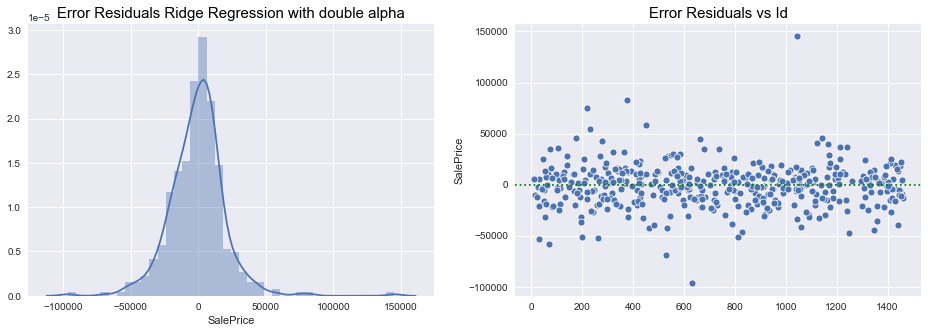

In [149]:
# Residual of Ridge Regression Model with doubled alpha

res_model_ridge_v2 = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_ridge_v2, bins=40)
plt.title('Error Residuals Ridge Regression with double alpha', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_ridge_v2)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> As expected even with double alpha, the residuals are normally distributed and the indepenence of residual is good.

In [150]:
# Store the metrics

ridge_regression_metrics_v2 = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

In [151]:
# Ridge Model column names
col_names = list(X_train.columns)
col_names.insert(0, "Intercept")

# Ridge Model Parameter Values
param_values = list(ridge_v2.coef_)
param_values.insert(0, ridge_v2.intercept_)

# Ridge Model - unified list
ridge_parameters_v2 = list(zip(col_names, np.round(param_values,1)))

Learnings from this sensitivity check on Ridge:
- R2 score did not change much when alpha was doubled.
- RMSE value also did not change much when alpha was doubled.
- Error residuals & independence of residuals looks good even with doubled alpha.
- Number of variables is still 199 since Ridge basically takes all the variables

## Step-8.2: What if we double the value of alpha for lasso ?

In [152]:
# Lasso model for doubled alpha = 150

alpha = 150
lasso_v2 = Lasso(alpha=alpha)
lasso_v2.fit(X_train, y_train)

Lasso(alpha=150)

In [153]:
# Training Set Predictions with doubled alpha

y_train_pred = lasso_v2.predict(X_train)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with Lasso Regression = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,1))

R2 Score for Training Dataset with Lasso Regression =  0.92
RMSE Score for Training Dataset with Lasso Regression =  22190.4


In [154]:
# Test Set Predictions with doubled alpha

y_test_pred = lasso_v2.predict(X_test)

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with Lasso Regression = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,1))

R2 Score for Test Dataset with Lasso Regression =  0.91
RMSE Score for Test Dataset with Lasso Regression =  21065.7


<h5 style = 'color:blue'> There is not a big change in lasso regression with alpha doubled.

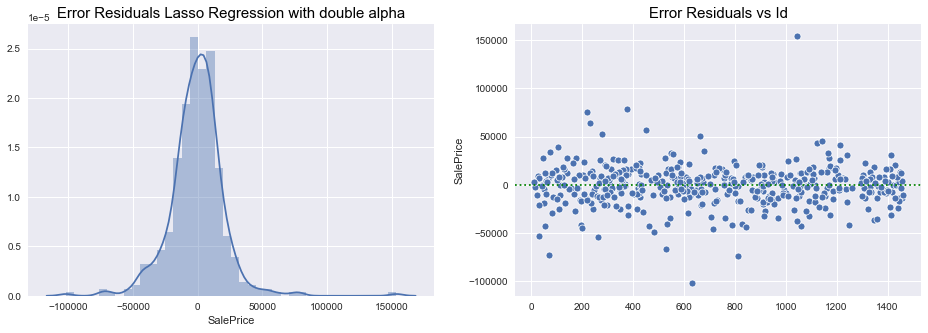

In [155]:
# Residual of Lasso Regression Model with alpha doubled.

res_model_lasso_v2 = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_lasso_v2, bins=40)
plt.title('Error Residuals Lasso Regression with double alpha', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_lasso_v2)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> As expected even with double alpha, the residuals are normally distributed and the indepenence of residual is good.

In [156]:
# Store the metrics with double alpha

lasso_regression_metrics_v2 = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

Let us find how many non zero parameters are generated by Lasso Regularization

In [157]:
# Lasso Model column names with double alpha

col_names = list(X_train.columns)
col_names.insert(0, "Intercept")

# Lasso Model Parameter Values
param_values = list(lasso_v2.coef_)
param_values.insert(0, lasso_v2.intercept_)

# Lasso Model - unified list
lasso_parameters_v2 = list(zip(col_names, np.round(param_values,1)))
lasso_non_zero_parameters_v2 = [row for row in lasso_parameters_v2 if abs(row[1] != 0)]
lasso_zero_parameters_v2 = [row for row in lasso_parameters_v2 if abs(row[1] == 0)]

In [158]:
# Check the number of non zero parameters from Lasso

print ('Number of non-zero parameters from Lasso = ', len(lasso_non_zero_parameters_v2))
print ('Number of zero parameters from Lasso = ', len(lasso_zero_parameters_v2))

Number of non-zero parameters from Lasso =  81
Number of zero parameters from Lasso =  118


Learnings from this sensitivity check on Lasso:
- R2 score did not change much when alpha was doubled.
- RMSE value also did not change much when alpha was doubled.
- Error residuals & independence of residuals looks good even with doubled alpha.
- Number of non-zero variables reduced from 99 to 81. 
- This trend of non-zero variables reducing shall continue with increasing alpha since the penalty term gets higher weigtage. But the scoring or the cost, which in this case neg_root_mean_squared_error will increase. 

## Step-8.3: What happens if five most important predictor variables in the lasso model are not available in the incoming data?

In [159]:
# Find out what are the top-5 parameters:

lasso_non_zero_parameters.sort(key=lambda x: x[1], reverse=True)
cols_not_available = []
for item in lasso_non_zero_parameters[:5]:
    cols_not_available.append(item[0])
    
print (cols_not_available)

['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'LotArea']


All of the 5 seems to be important parameters, when we think intuitively.

In [160]:
# Shape of original dataframe

X_train.shape

(1015, 198)

In [161]:
# Shape of dataframe with 5 columns not regarded

X_train[[col for col in X_train.columns if col not in cols_not_available]].shape

(1015, 193)

The above way of removing incoming data without actually dropping them from X_train seems to work. Let us proceed.

In [162]:
# Lasso model for alpha = 75 and top 5 variables not included.

alpha = 75
lasso_v3 = Lasso(alpha=alpha)
lasso_v3.fit(X_train[[col for col in X_train.columns if col not in cols_not_available]], y_train)

Lasso(alpha=75)

In [163]:
# Training Set Predictions for alpha = 75 and top 5 variables not included.

y_train_pred = lasso_v3.predict(X_train[[col for col in X_train.columns if col not in cols_not_available]])

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Training Dataset with Lasso Regression = ', 
       round(r2_score(y_train, y_train_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Training Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_train, y_pred=y_train_pred)**0.5,1))

R2 Score for Training Dataset with Lasso Regression =  0.92
RMSE Score for Training Dataset with Lasso Regression =  22598.7


In [164]:
# Test Set Predictions for alpha = 75 and top 5 variables not included.

y_test_pred = lasso_v3.predict(X_test[[col for col in X_test.columns if col not in cols_not_available]])

# r2 score for training dataset
from sklearn.metrics import r2_score
print ('R2 Score for Test Dataset with Lasso Regression = ', 
       round(r2_score(y_test, y_test_pred),2))

# RMSE score for training dataset
from sklearn.metrics import mean_squared_error
print ('RMSE Score for Test Dataset with Lasso Regression = ', 
       round(mean_squared_error(y_true=y_test, y_pred=y_test_pred)**0.5,1))

R2 Score for Test Dataset with Lasso Regression =  0.9
RMSE Score for Test Dataset with Lasso Regression =  21979.6


<h5 style = 'color:blue'> There is not a big change in R2 score for lasso regression with top-5 variables dropped. But the cost which was RMSE has increased.

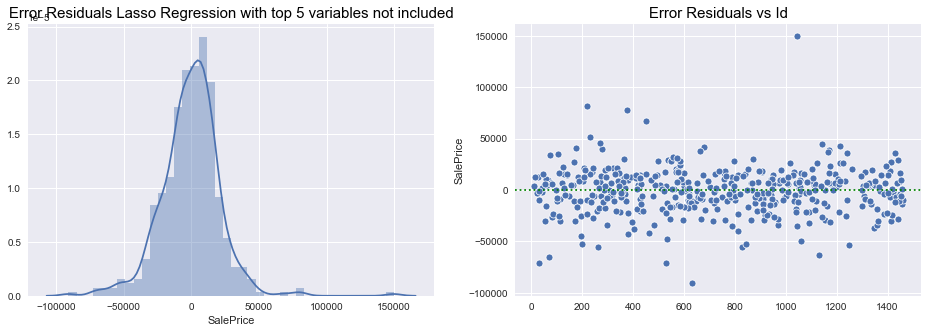

In [165]:
# Residual of Lasso Regression Model for alpha = 75 and top 5 variables not included.

res_model_lasso_v3 = y_test - y_test_pred

# Distribution plot of residuals - Check of Normal Distrition Assumption
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sns.distplot(res_model_lasso_v3, bins=40)
plt.title('Error Residuals Lasso Regression with top 5 variables not included', fontdict={'fontsize':15, 'color':'black'})

# Scatter plot of residuals - Check of error terms independent assumption
plt.subplot(1,2,2)
sns.scatterplot(x=X_test.index, y=res_model_lasso_v3)
plt.axhline(y=0, color='g', linestyle=':')
plt.title('Error Residuals vs Id', fontdict={'fontsize':15, 'color':'black'})
plt.show()

<h5 style = 'color:blue'> As expected even with top-5 variables dropped, the residuals are normally distributed and the indepenence of residual is good.

In [166]:
# Store the metrics for alpha = 75 and top 5 variables not included.

lasso_regression_metrics_v3 = get_metrics_list(y_train, y_train_pred, y_test, y_test_pred)

Let us find how many non zero parameters are generated by Lasso Regularization

In [167]:
# Lasso Model column names for alpha = 75 and top 5 variables not included.

col_names = list(X_train[[col for col in X_train.columns if col not in cols_not_available]].columns)
col_names.insert(0, "Intercept")

# Lasso Model Parameter Values
param_values = list(lasso_v3.coef_)
param_values.insert(0, lasso_v3.intercept_)

# Lasso Model - unified list
lasso_parameters_v3 = list(zip(col_names, np.round(param_values,1)))
lasso_non_zero_parameters_v3 = [row for row in lasso_parameters_v3 if abs(row[1] != 0)]
lasso_zero_parameters_v3 = [row for row in lasso_parameters_v3 if abs(row[1] == 0)]

In [168]:
# Check the number of non zero parameters from Lasso for alpha = 75 and top 5 variables not included.

print ('Number of non-zero parameters from Lasso = ', len(lasso_non_zero_parameters_v3))
print ('Number of zero parameters from Lasso = ', len(lasso_zero_parameters_v3))

Number of non-zero parameters from Lasso =  105
Number of zero parameters from Lasso =  89


Learnings from this sensitivity check on Lasso:
- R2 score did not change much when top-5 variables are not there in the incoming data.
- RMSE value increased when top-5 variables are not there in the incoming data.
- Error residuals & independence of residuals looks good even when top-5 variables are not there in the incoming data.
- Number of non-zero variables increased from 99 to 105. Makes sense because model now needs to make up for top variables by including more number of variables.

In [169]:
# Find out what are the 'new' top-5 parameters:

lasso_non_zero_parameters_v3.sort(key=lambda x: x[1], reverse=True)
for item in lasso_non_zero_parameters_v3[:6]:
    print (item)

('1stFlrSF', 135695.6)
('Intercept', 121464.5)
('2ndFlrSF', 95957.3)
('BsmtFinSF1', 88538.2)
('BsmtUnfSF', 50516.3)
('Neighborhood_StoneBr', 35701.4)


In [170]:
# Create a dataframe to compare result metrics of all the 7 models we built so far.

col_1 = ['R2 Score Training','R2 Score Test','RMSE Training','RMSE Test']
df_result_metrics = pd.DataFrame()
df_result_metrics['Metrics'] = col_1
df_result_metrics['Linear Regression with GrLivArea and OverallQual'] = linear_regression_model1_metrics
df_result_metrics['Linear Regression with 8 Predictor Variables'] = linear_regression_model2_metrics
df_result_metrics['Ridge Regression with alpa = 2'] = ridge_regression_metrics
df_result_metrics['Lasso Regression with alpha = 75'] = lasso_regression_metrics
df_result_metrics['Ridge Regression with alpa = 4'] = ridge_regression_metrics_v2
df_result_metrics['Lasso Regression with alpha = 150'] = lasso_regression_metrics_v2
df_result_metrics['Lasso Regression with alpha = 75 and top-5 variables not included'] = lasso_regression_metrics_v3

# List to store the number of variable in all the 7 models we built so far
len_list = [len(lr_1.coef_)+1,
      len(reg_obj.coef_)+1,
      len(ridge.coef_)+1,
      len(lasso_non_zero_parameters),
      len(ridge_v2.coef_)+1,
      len(lasso_non_zero_parameters_v2),
      len(lasso_non_zero_parameters_v3)]

# Transpose the dataframe for a better overview when displayed
df_result_metrics = df_result_metrics.reset_index().T
df_result_metrics.columns = col_1
df_result_metrics.drop(index='index', inplace=True)
df_result_metrics.drop(index='Metrics', inplace=True)
df_result_metrics['Number of variables incl Intercept'] = len_list

## Step-9: Conclusions

**Optimal Value of Lambda (alpha)**

- Ridge Regularization Optimal Value of Lambda = 2
- Lasso Regularization Optimal Value of Lambda = 75

**Metrics R2 score & RMSE**

In [171]:
# Let us print the dataframe to compare result metrics which we created above

df_result_metrics

,R2 Score Training,R2 Score Test,RMSE Training,RMSE Test,Number of variables incl Intercept
Linear Regression with GrLivArea and OverallQual,0.74,0.74,40776.2,35197.3,3
Linear Regression with 8 Predictor Variables,0.8,0.8,35275.4,30572.2,9
Ridge Regression with alpa = 2,0.94,0.91,20333,20854.8,199
Lasso Regression with alpha = 75,0.93,0.91,21182.1,20688.5,99
Ridge Regression with alpa = 4,0.93,0.91,20888.3,20670.4,199
Lasso Regression with alpha = 150,0.92,0.91,22190.4,21065.7,81
Lasso Regression with alpha = 75 and top-5 variables not included,0.92,0.9,22598.7,21979.6,105


**Lessons learnt from sensitivity studies by doubling alpha in ridge and lasso & not including top-5 variables in lasso**

- **R2 score** does not change much with doubling alpha in both Ridge and Lasso. 
- **R2 score** does not change much even when five most important predictor variables in the lasso model are not available in the incoming data. 

- **RMSE** does not change much with doubling alpha in Ridge. 
- **RMSE** increases with doubling alpha in Lasso. 
- **RMSE** increases when five most important predictor variables in the lasso model are not available in the incoming data.

- **No. of variables** for Lasso model reduces when alpha is doubled. This is intuitive because penalty term gets higher weightage & cost in the form if RMSE increases. 
- **No. of variables** for Lasso model slightly increases when five most important predictor variables in the lasso model are not available in the incoming data. This makes sense because good variables are not available and model has to make up for the loss by incuding more variables than before.

**Top-5 positive variables from Ridge**

In [172]:
# Print Ridge Top-5 Variables

print ('-----------------------------------------------------------')
print ('Top-5 Positive Variables from Ridge Regression with alpha 2')
print ('-----------------------------------------------------------')
ridge_parameters.sort(key=lambda x: x[1], reverse=True)
for item in ridge_parameters[:5]:
    print (item)
    
print ('-----------------------------------------------------------')
print ('Top-5 Positive Variables from Ridge Regression with alpha 4')
print ('-----------------------------------------------------------')
ridge_parameters_v2.sort(key=lambda x: x[1], reverse=True)
for item in ridge_parameters_v2[:6]:
    print (item)

-----------------------------------------------------------
Top-5 Positive Variables from Ridge Regression with alpha 2
-----------------------------------------------------------
('GrLivArea', 64806.9)
('OverallQual', 62709.0)
('BsmtFinSF1', 51274.1)
('TotalBsmtSF', 50598.8)
('1stFlrSF', 45417.4)
-----------------------------------------------------------
Top-5 Positive Variables from Ridge Regression with alpha 4
-----------------------------------------------------------
('GrLivArea', 58724.3)
('OverallQual', 58049.9)
('Intercept', 53064.6)
('BsmtFinSF1', 46005.9)
('TotalBsmtSF', 44829.9)
('1stFlrSF', 43101.5)


**Top-5 positive variables from Lasso**

In [173]:
# Print Lasso Top-5 Variables

print ('-----------------------------------------------------------')
print ('Top-5 Positive Variables from Lasso Regression with alpa 75')
print ('-----------------------------------------------------------')
lasso_non_zero_parameters.sort(key=lambda x: x[1], reverse=True)
for item in lasso_non_zero_parameters[:5]:
    print (item)
    
print ('-------------------------------------------------------------')
print ('Top-5 Positive Variables from Lasso Regression with alpha 150')
print ('-------------------------------------------------------------')
lasso_non_zero_parameters_v2.sort(key=lambda x: x[1], reverse=True)
for item in lasso_non_zero_parameters_v2[:6]:
    print (item)
    
print ('---------------------------------------------------------------------------------------------')
print ('Top-5 Positive Variables from Lasso Regression with alpha 75 and top-5 variables not regarded')
print ('---------------------------------------------------------------------------------------------')
lasso_non_zero_parameters_v3.sort(key=lambda x: x[1], reverse=True)
for item in lasso_non_zero_parameters_v3[:7]:
    print (item)

-----------------------------------------------------------
Top-5 Positive Variables from Lasso Regression with alpa 75
-----------------------------------------------------------
('GrLivArea', 146371.1)
('OverallQual', 81324.4)
('TotalBsmtSF', 72310.3)
('OverallCond', 50873.5)
('LotArea', 50536.8)
-------------------------------------------------------------
Top-5 Positive Variables from Lasso Regression with alpha 150
-------------------------------------------------------------
('GrLivArea', 160188.8)
('OverallQual', 88254.1)
('TotalBsmtSF', 62928.7)
('OverallCond', 45768.8)
('Intercept', 44085.4)
('BsmtFinSF1', 41533.2)
---------------------------------------------------------------------------------------------
Top-5 Positive Variables from Lasso Regression with alpha 75 and top-5 variables not regarded
---------------------------------------------------------------------------------------------
('1stFlrSF', 135695.6)
('Intercept', 121464.5)
('2ndFlrSF', 95957.3)
('BsmtFinSF1', 88

**Top-5 Negative variables from Ridge**

In [174]:
# Print Ridge Top-5 Variables

print ('-----------------------------------------------------------')
print ('Top-5 Negative Variables from Ridge Regression with alpha 2')
print ('-----------------------------------------------------------')
ridge_parameters.sort(key=lambda x: x[1], reverse=False)
for item in ridge_parameters[:5]:
    print (item)
    
print ('-----------------------------------------------------------')
print ('Top-5 Negative Variables from Ridge Regression with alpha 4')
print ('-----------------------------------------------------------')
ridge_parameters_v2.sort(key=lambda x: x[1], reverse=False)
for item in ridge_parameters_v2[:6]:
    print (item)

-----------------------------------------------------------
Top-5 Negative Variables from Ridge Regression with alpha 2
-----------------------------------------------------------
('Age_since_built', -25648.7)
('KitchenAbvGr', -24884.1)
('ExterQual_TA', -24377.8)
('KitchenQual_TA', -22611.0)
('ExterQual_Gd', -20869.1)
-----------------------------------------------------------
Top-5 Negative Variables from Ridge Regression with alpha 4
-----------------------------------------------------------
('ExterQual_TA', -23709.4)
('KitchenQual_TA', -22805.1)
('KitchenQual_Gd', -20548.8)
('KitchenAbvGr', -19827.7)
('ExterQual_Gd', -19431.0)
('Age_since_built', -18031.1)


**Top-5 negative variables from Lasso**

In [175]:
# Print Lasso Top-5 Variables

print ('-----------------------------------------------------------')
print ('Top-5 Negative Variables from Lasso Regression with alpa 75')
print ('-----------------------------------------------------------')
lasso_non_zero_parameters.sort(key=lambda x: x[1], reverse=False)
for item in lasso_non_zero_parameters[:5]:
    print (item)
    
print ('-------------------------------------------------------------')
print ('Top-5 Negative Variables from Lasso Regression with alpha 150')
print ('-------------------------------------------------------------')
lasso_non_zero_parameters_v2.sort(key=lambda x: x[1], reverse=False)
for item in lasso_non_zero_parameters_v2[:6]:
    print (item)
    
print ('---------------------------------------------------------------------------------------------')
print ('Top-5 Negative Variables from Lasso Regression with alpha 75 and top-5 variables not regarded')
print ('---------------------------------------------------------------------------------------------')
lasso_non_zero_parameters_v3.sort(key=lambda x: x[1], reverse=False)
for item in lasso_non_zero_parameters_v3[:6]:
    print (item)

-----------------------------------------------------------
Top-5 Negative Variables from Lasso Regression with alpa 75
-----------------------------------------------------------
('Age_since_built', -34690.4)
('ExterQual_TA', -21572.1)
('KitchenAbvGr', -21484.2)
('KitchenQual_TA', -20442.5)
('KitchenQual_Gd', -18601.8)
-------------------------------------------------------------
Top-5 Negative Variables from Lasso Regression with alpha 150
-------------------------------------------------------------
('Age_since_built', -26068.5)
('ExterQual_TA', -20673.6)
('KitchenQual_TA', -18959.9)
('MSSubClass', -17505.6)
('KitchenQual_Gd', -17137.8)
('ExterQual_Gd', -16594.4)
---------------------------------------------------------------------------------------------
Top-5 Negative Variables from Lasso Regression with alpha 75 and top-5 variables not regarded
---------------------------------------------------------------------------------------------
('KitchenAbvGr', -41049.0)
('ExterQual_Fa',

**Conclusion: Lasso regression can be used in this case, because it aids in feature selection and feature importances.**

`Submission Harish Dave`